<a href="https://colab.research.google.com/github/ShoSato-047/R_review/blob/main/STAT380_Introduction_to_R_in_Google_Colab_ggplot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction

This notebook introduces you to the fundamentals underlying the most popular graphing package in R: the `ggplot2` package.  

We start by loading the required packages. `ggplot2` is included in the `tidyverse` package,  and is the current standard for data visualization in R.  Authored by Hadley Wickham, `gg` stands for "Grammar of Graphics."  In learning `ggplot2`, you may find the following [cheat sheet](https://medium.com/@alexander.pfyffer/data-visualization-with-ggplot2-cheat-sheet-974d8a709b53) to be a helpful reference.


In [1]:
#Load the ggplot2 package:
library(ggplot2)

In [2]:
#This code expands the default plot size:
options(repr.plot.width=10, repr.plot.height=8)

# Brief overview of the grammar of graphics

To visualize any data set using the Grammar of Graphics, it helps to understand the 3 components of which any graph is comprised:

1. Geoms
2. Aesthetics
3. Scales

 **Geoms** are the visual entities that we see on a graph. In the image below, we see three examples of geoms: a circular ***point***, a ***bar***, and a ***line***:

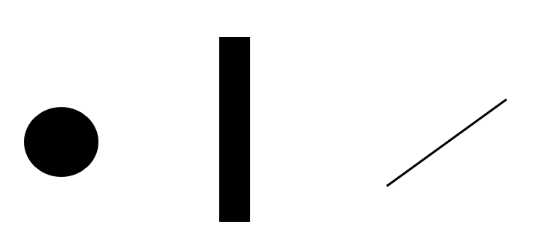

An **aesthetic** is a visual attribute of a geometry.  For example, a point geometry has the following aesthetics:

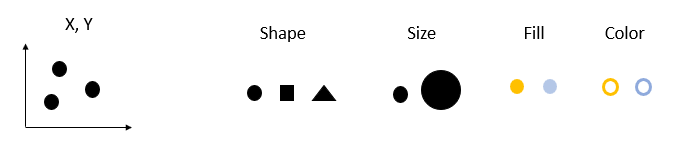

A **scale** controls how a data column is mapped to an aesthetic attribute.  To create a plot, one must specify the desired geom; which data variables are to be aesthetically mapped to the geom; and the scales to use to control the mapping.  The skeleton of any `ggplot2` command is as follows; parts in \* \*  are replaced with specific data variable names, geoms, and scales:


`ggplot(data = *nameofdata*) + geom_*nameofgeom*(aes(*scale1* = *variable1*, *scale2* = *variable2*))`


# The basics

Let's illustrate these ideas with a very simple little data set:

In [3]:
df <- data.frame(A = c(2,1,4,9),
                 B  = c(4,1,15,80),
                 C = c(1,2,3,4),
                 D = c('far','far','near','near'))
df

A,B,C,D
<dbl>,<dbl>,<dbl>,<chr>
2,4,1,far
1,1,2,far
4,15,3,near
9,80,4,near



We'll begin by mapping `A` and `B` to the `point` geom on a Cartesian plane:

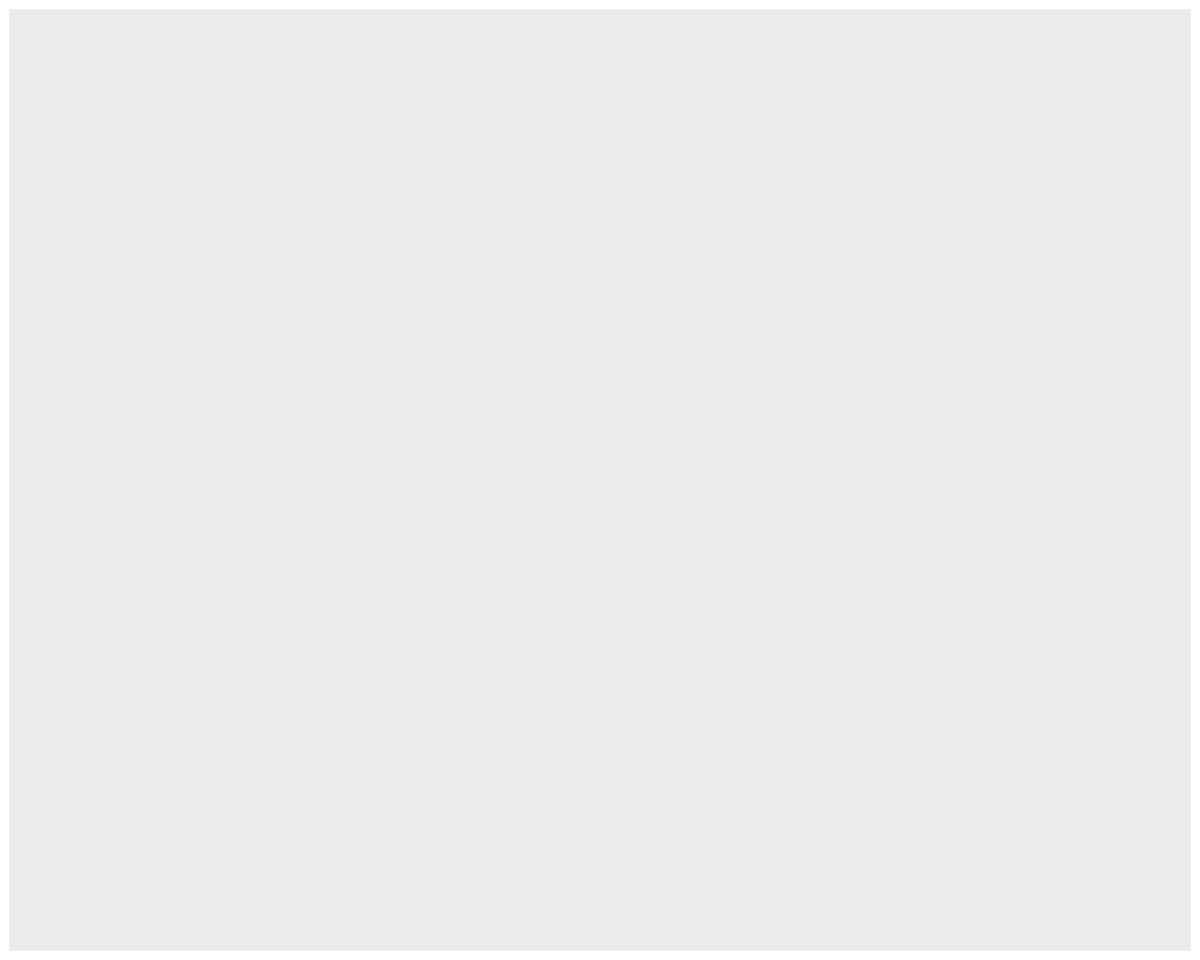

In [4]:
ggplot(data = df)

Note that without any geometries specified, we just get a blank canvas.  We add geometries, in this case points, with `+ geom_point()`:

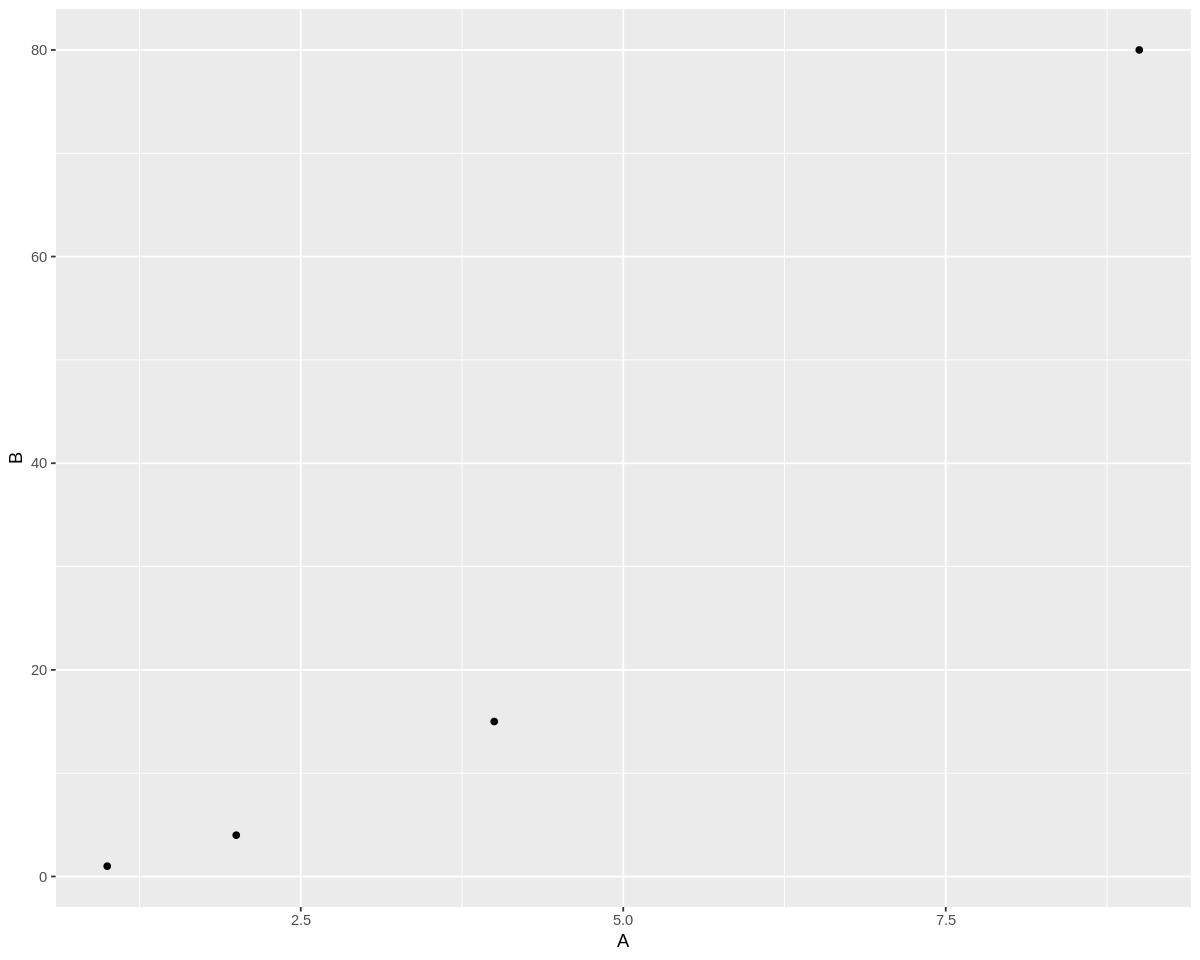

In [5]:
ggplot(data = df) + geom_point(aes(x = A,y=B))

We can employ other scales outside of aesthetic data mappings.  For example, if we want to change the **shape**, **color**, and **size** scale, we can do so with the following:

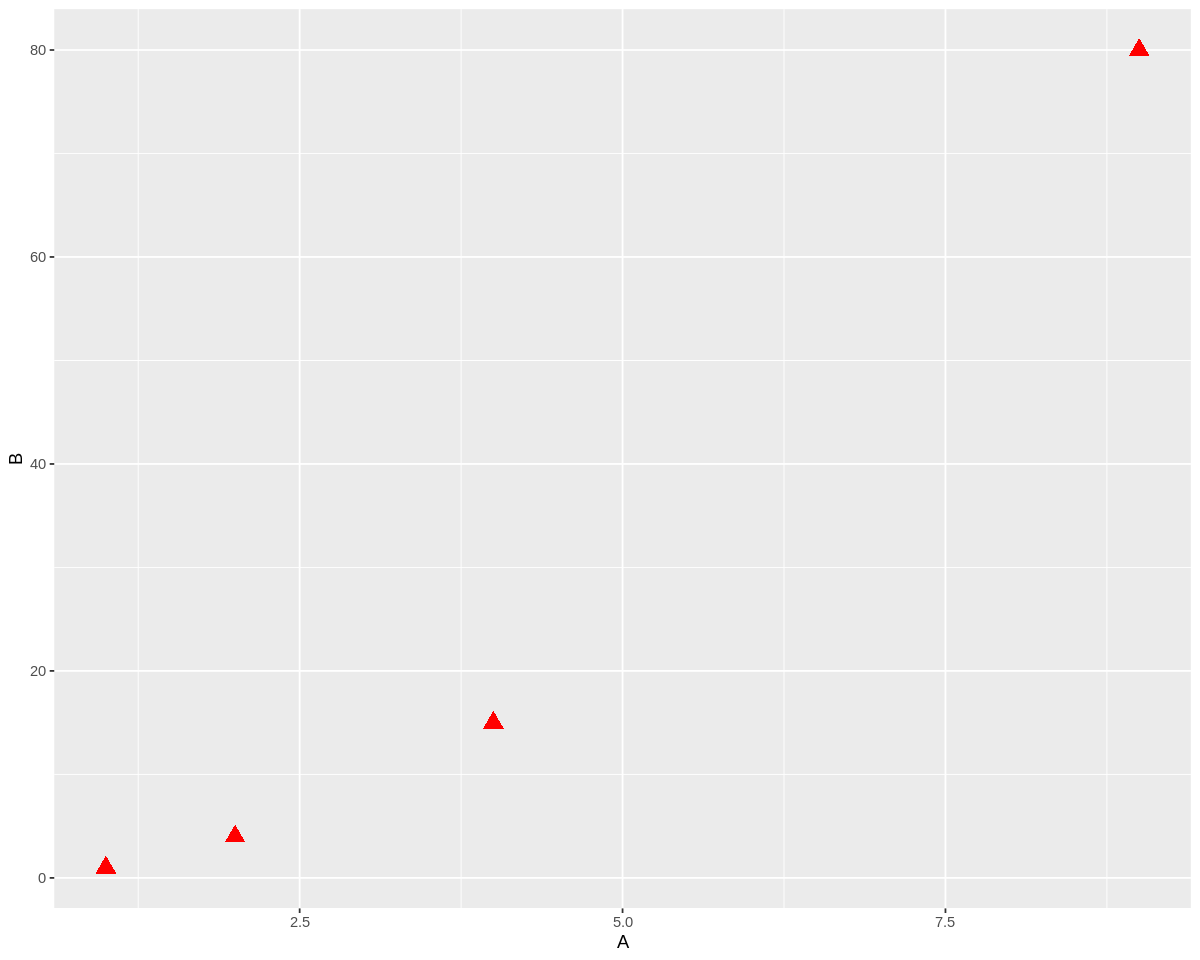

In [ ]:
ggplot(data = df) + geom_point(aes(x = A,y=B), shape = 17,color='red',size=4)

Notice in the above code that the scales that are not mapped to data are *outside* the `aes()` command.  

The `shape` specification comes from looking at the R catalog of shape codes:

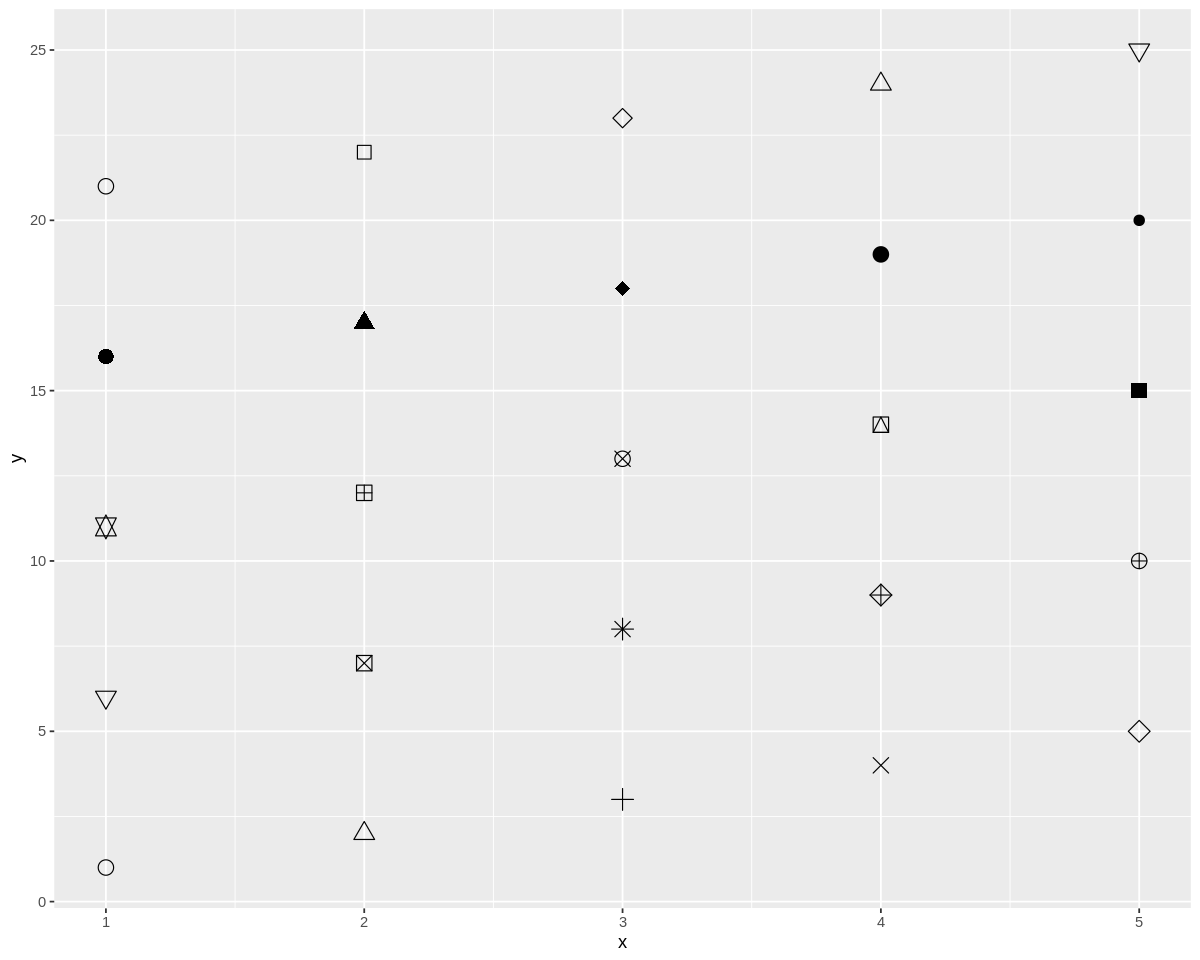

In [ ]:
df2 <- data.frame(x = 1:5 , y = 1:25, z = 1:25)
s <- ggplot(df2, aes(x = x, y = y))
s + geom_point(aes(shape = z), size = 4) + scale_shape_identity()


Now suppose we want to aesthetically map other variables with the **shape**, **color**, and **size** scales.  We must now put these specifications inside the `aes()` command and specify the variables we wish to map.  Consider the following code, and note the different looks, error messages and warnings that appear when attempting to apply aesthetic mappings using various scales depending on the data type. In `ggplot`-speak, "continuous" refers to quantitative data in general; while "discrete" refers to categorical data:


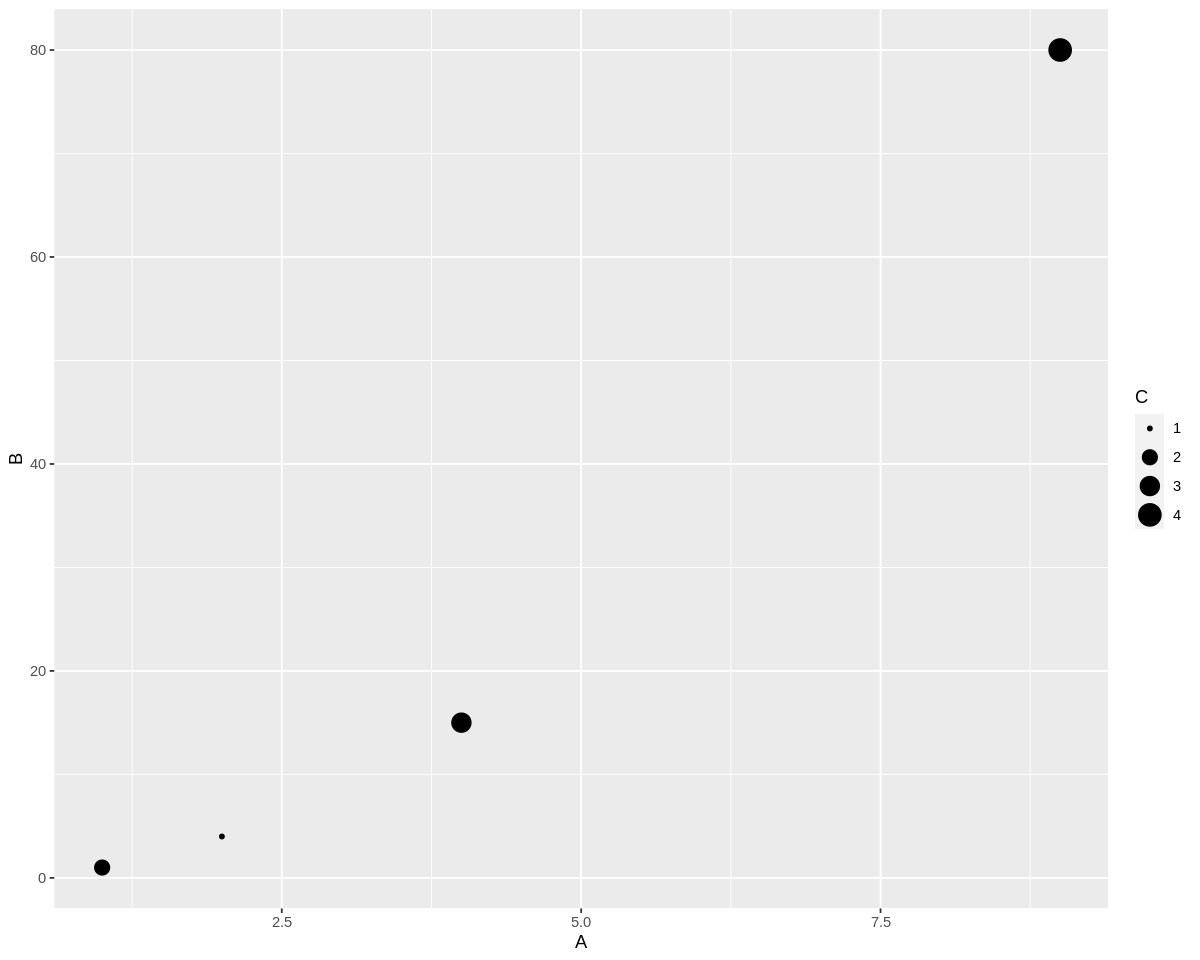

In [ ]:
#Mapping continuous C with size:
ggplot(data = df) + geom_point(aes(x = A,y=B, size = C))

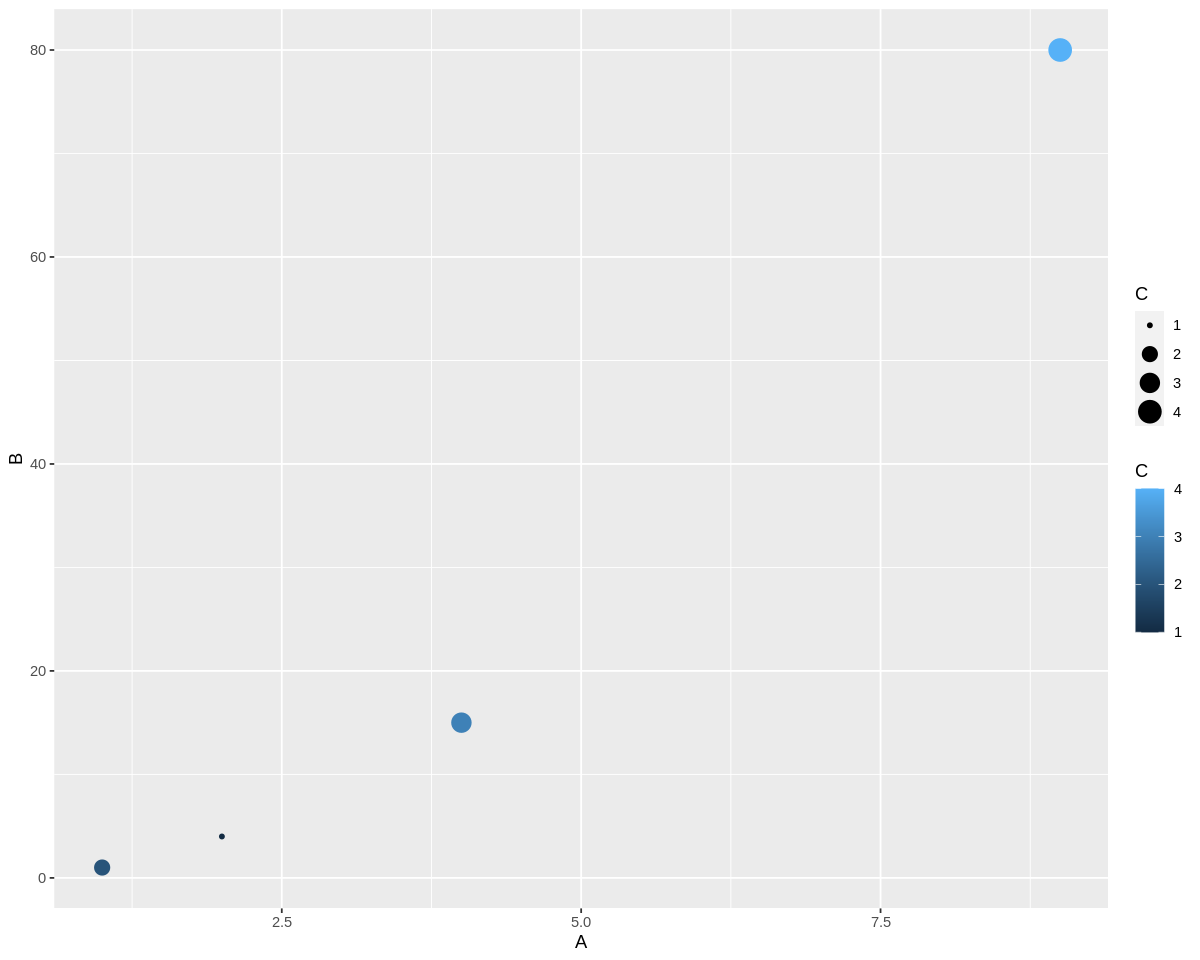

In [ ]:
#Mapping continuous C with size and color:
ggplot(data = df) + geom_point(aes(x = A,y=B, size = C, color = C))

In [ ]:
#Mapping continuous C with shape... uh oh!
#Why doesn't this work?

ggplot(data = df) + geom_point(aes(x = A,y=B, shape = C))

ERROR while rich displaying an object: Error in `geom_point()`:
! Problem while computing aesthetics.
ℹ Error occurred in the 1st layer.
Caused by error in `scale_f()`:
! A continuous variable cannot be mapped to the shape aesthetic
ℹ choose a different aesthetic or use `scale_shape_binned()`

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .    

The error from the above chunk is a lot of unhelpful stuff, but buried in there is the following:

```
A continuous variable cannot be mapped to the shape aesthetic


***


## **Task**

Can you create these graphs?

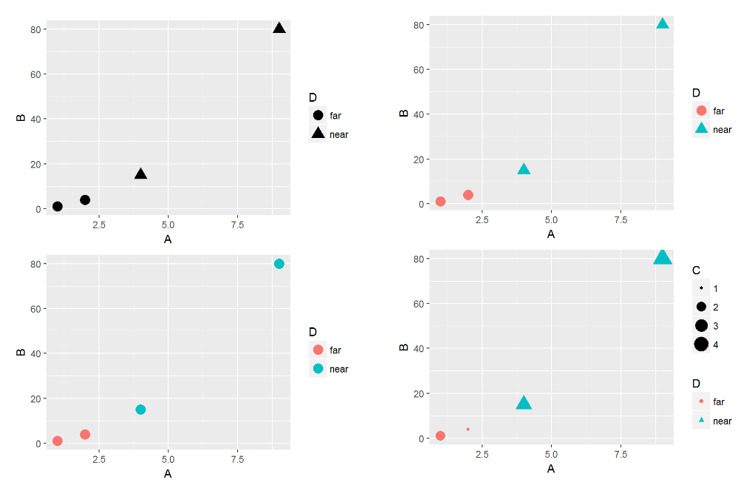

Note some interesting concepts illustrated here:

* *Continuous* (numeric, quantitative) variables should be mapped using **size** or **color** scales; these are the scales that can encode quantity.
* *Discrete* (categorical) variables should be mapped with **shape** or **color** scales; these are the scales that are best used for indicating "categories."  




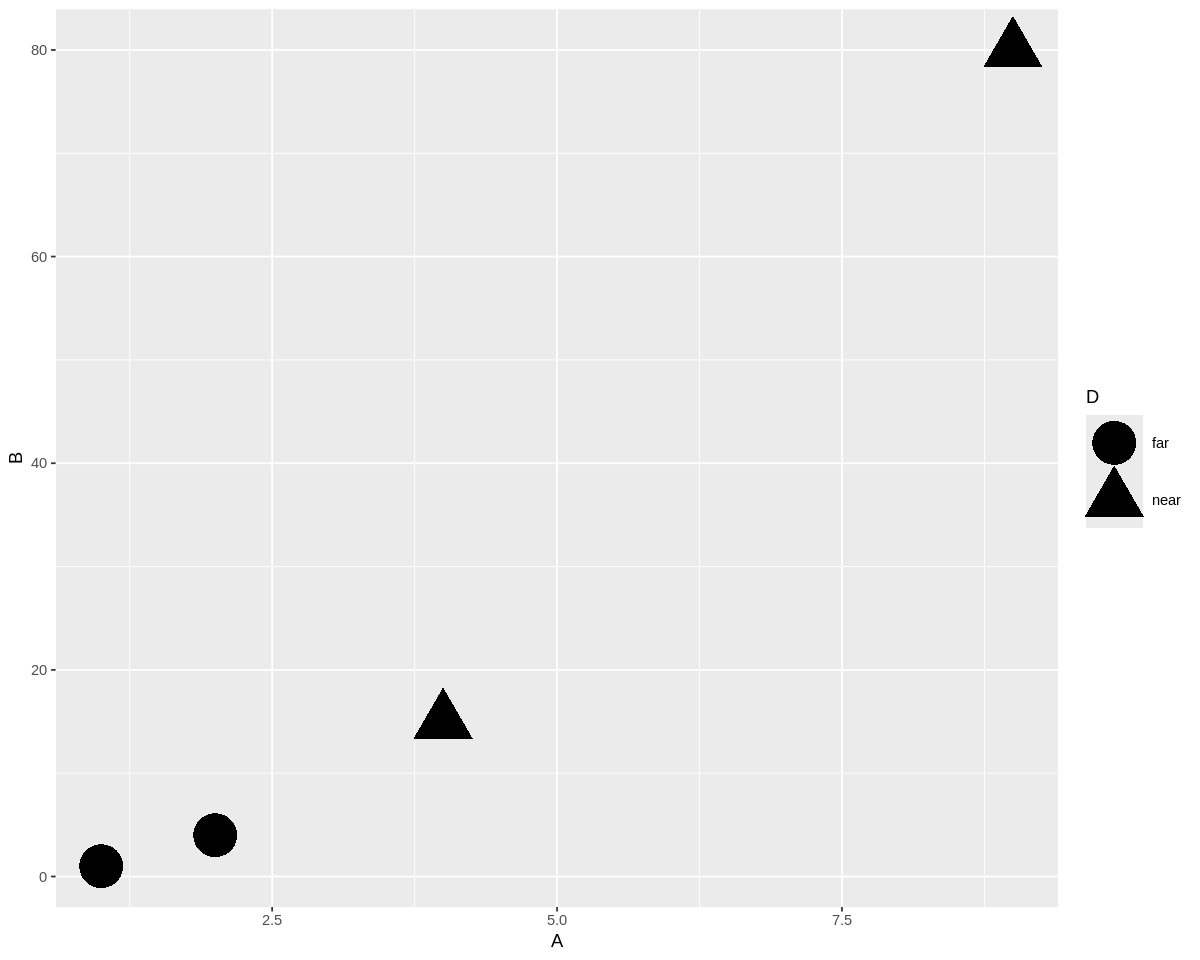

In [9]:
ggplot(data=df) +
  geom_point(aes(x = A,y=B, shape=D), size=12)

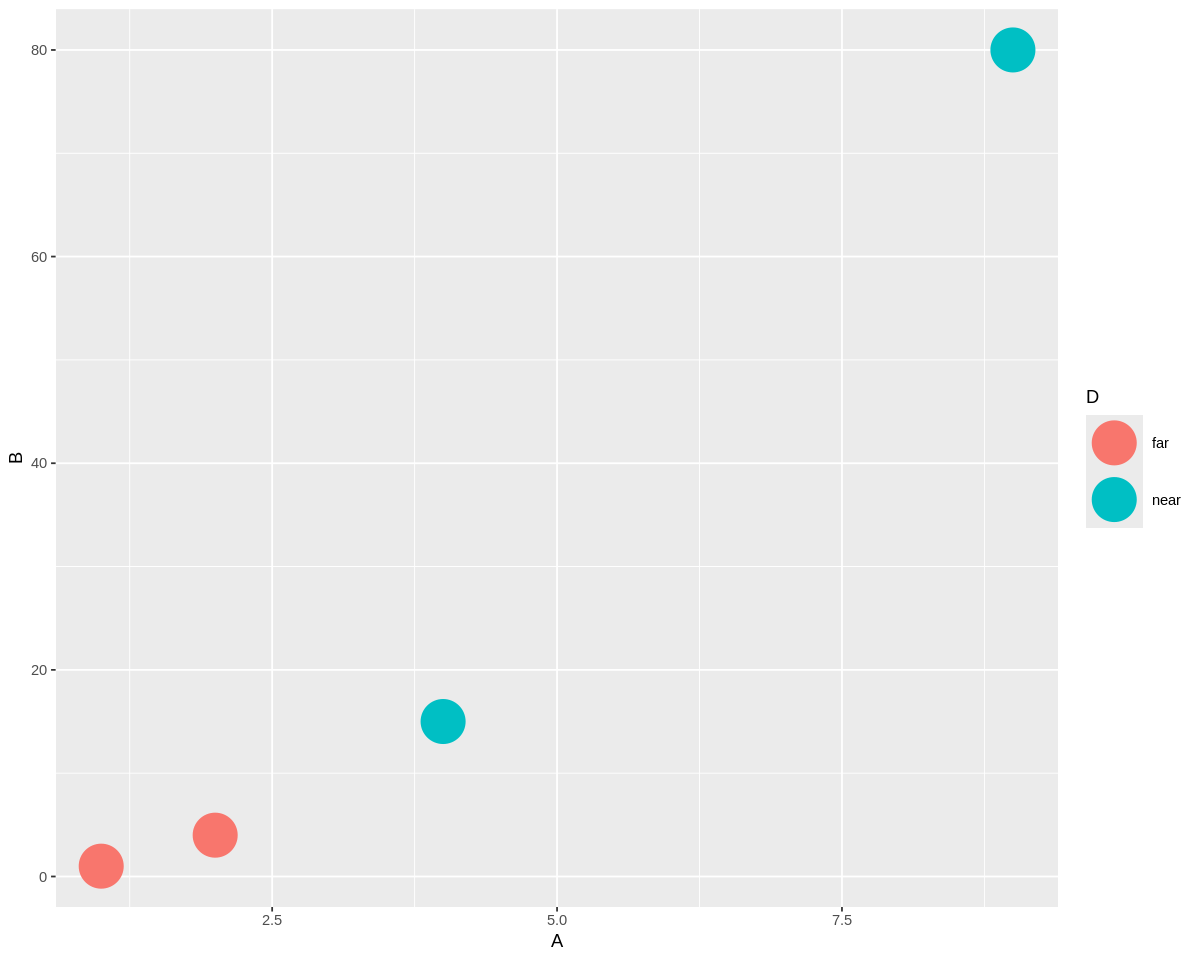

In [12]:
ggplot(data=df) +
  geom_point(aes(x=A, y=B, color=D), size=12)

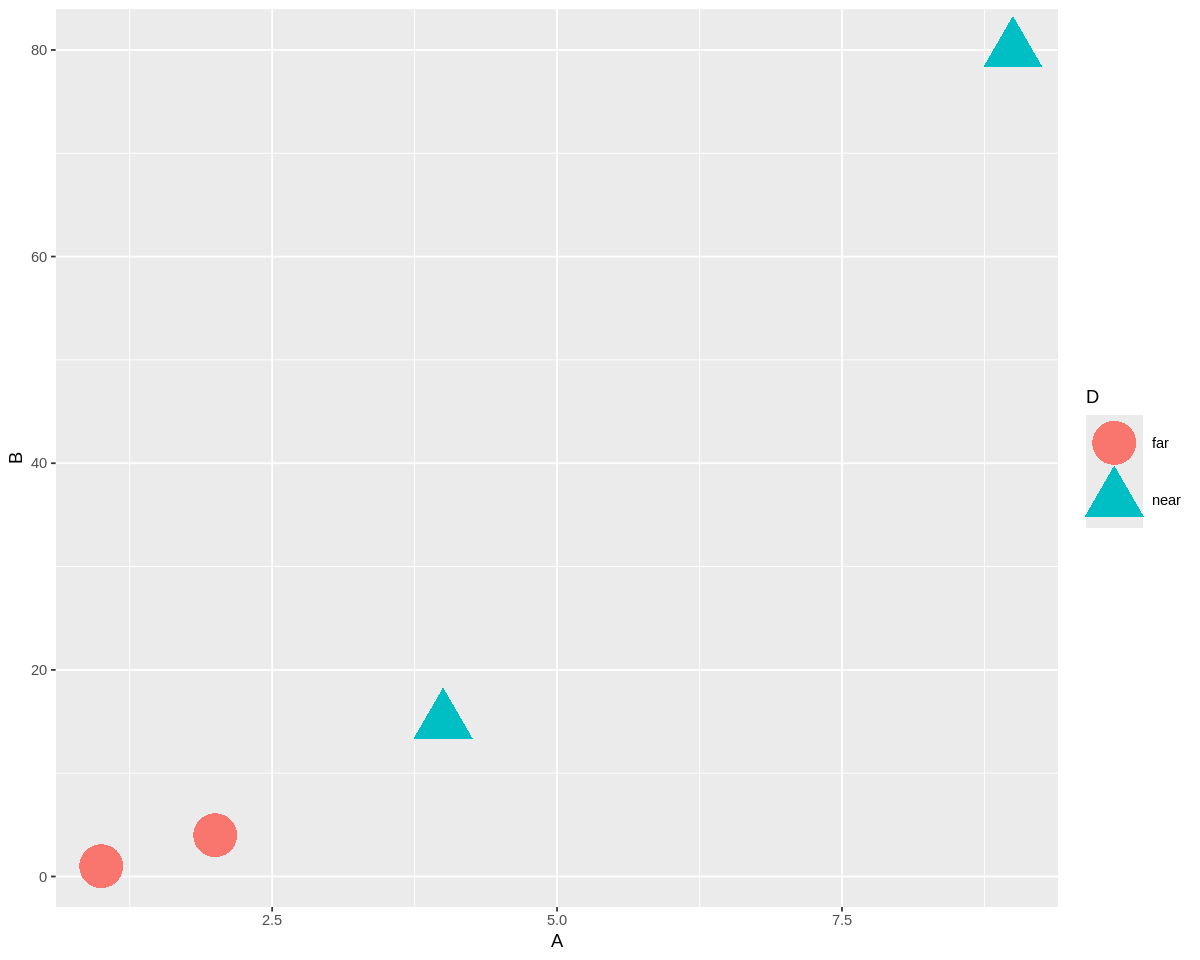

In [14]:
ggplot(data=df) +
  geom_point(aes(x=A, y=B, shape=D, color=D), size=12)

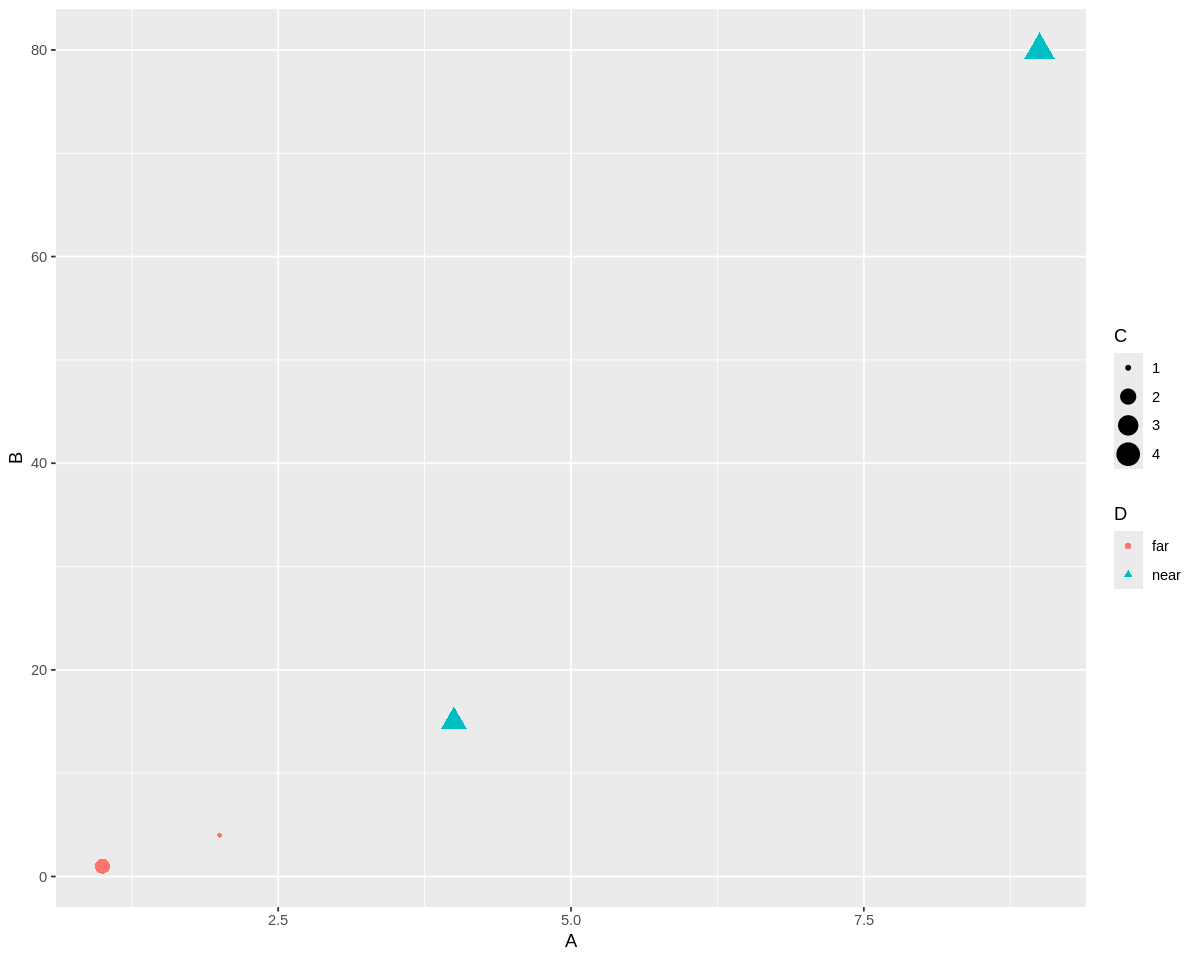

In [18]:
ggplot(data=df) +
  geom_point(aes(x=A, y=B, shape=D, color=D, size=C))

***

# Layers

A very important aspect of the `ggplot2` package is the idea of *layers*.  Aesthetic mappings to different geoms can take place simply by specifying additional mappings with a `+` sign.  For example, suppose we want to create the above scatterplots with points *and* lines.  This requires two aesthetic mappings: one from the data to the points geom, and one from the data to the lines geom.  We can see this in what follows.  Note that because both `geom_point()` and `geom_line()` rely on the same aesthetic mapping, we could simplify the code by specifiying the appropriate mapping in the initial `ggplot()` command. The following two lines of code are equivalent:

`ggplot(data = df) + geom_point(aes(x = A,y=B), size = 4) + geom_line(aes(x = A,y=B))`

`ggplot(aes(x = A, y = B), data = df) + geom_point(size = 4) + geom_line()`

***  

## **Task**

Re-create these plots.  Not sure what aesthetics are available for a given geometry?  Use the help files (e.g. `?geom_line` or Google!)

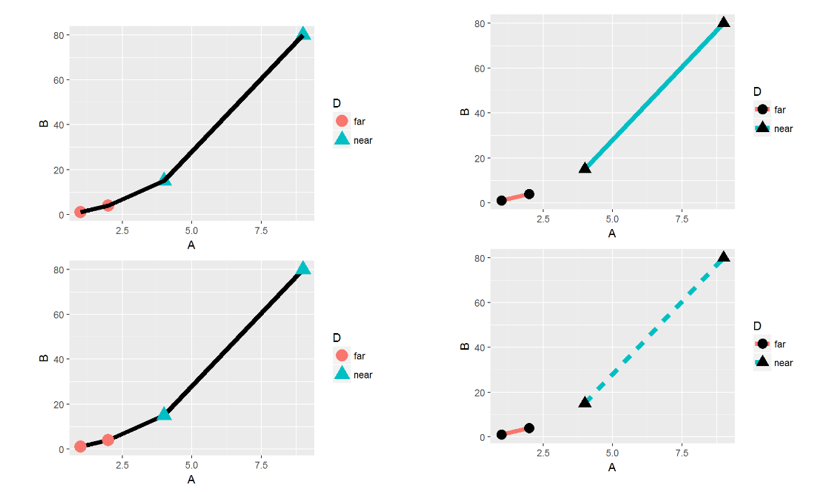

In [29]:
?geom_line

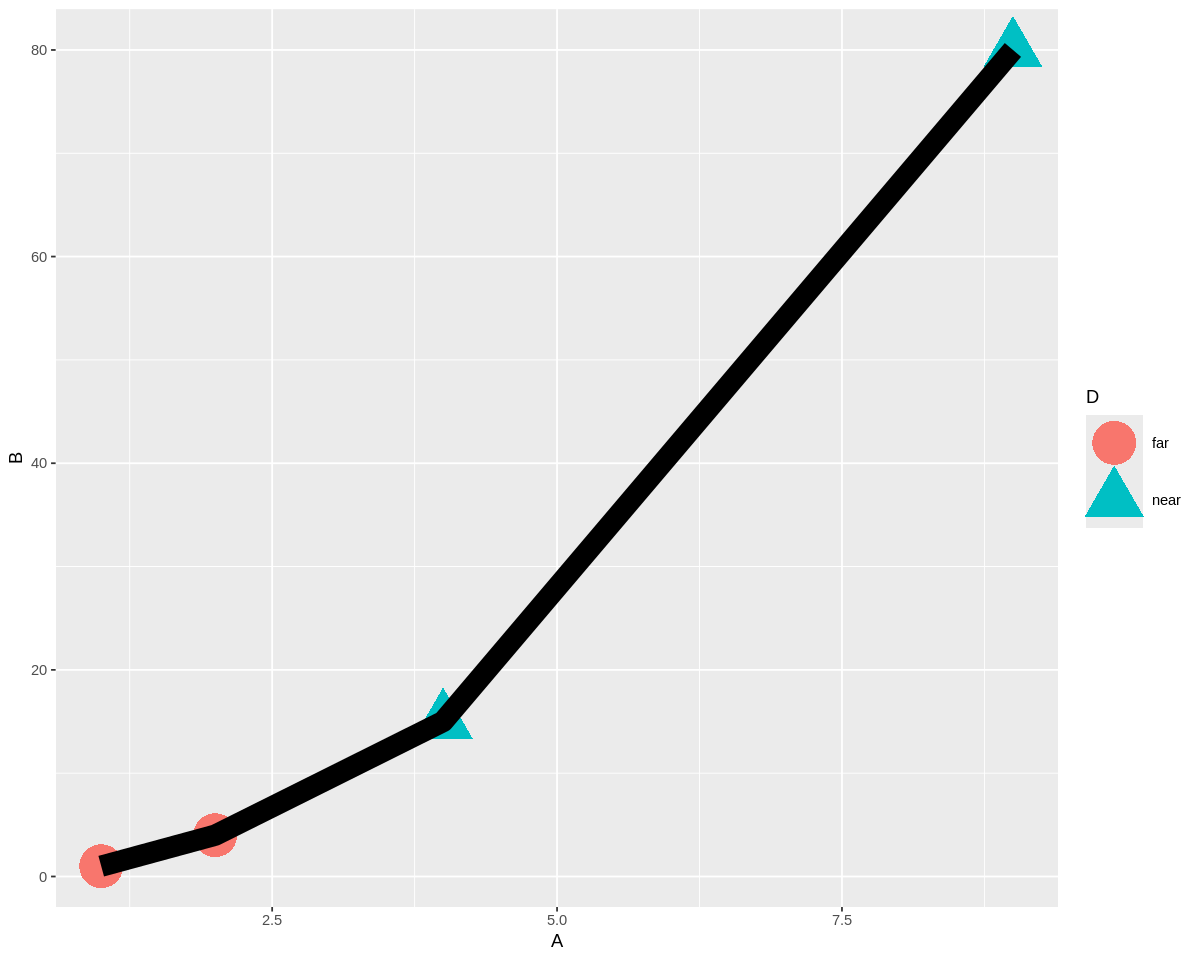

In [25]:
ggplot(data=df) +
  geom_point(aes(x=A, y=B, color=D, shape=D), size=12) +
    geom_line(aes(x=A, y=B), size=6)

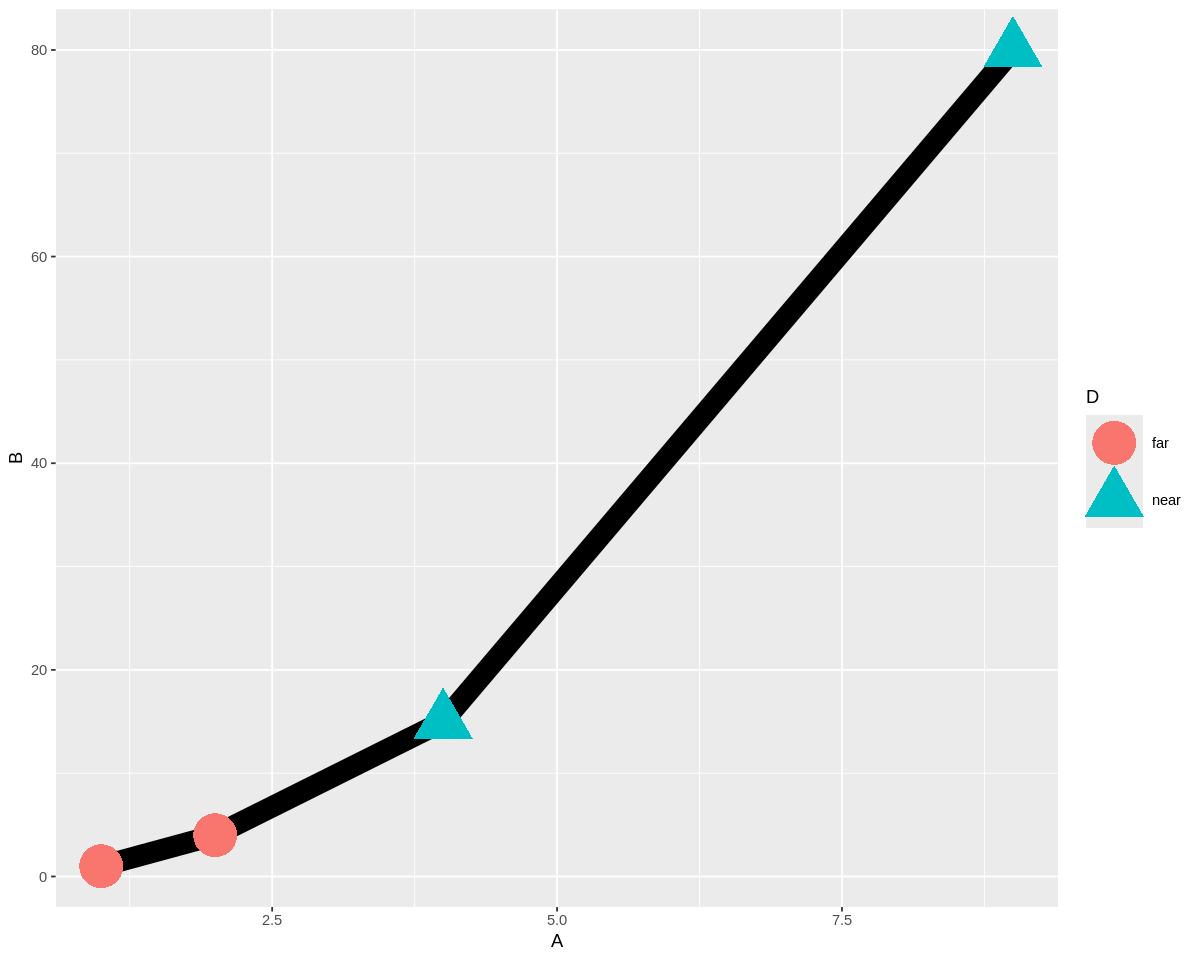

In [26]:
ggplot(data=df) +
  geom_line(aes(x=A, y=B), size=6) +
    geom_point(aes(x=A, y=B, color=D, shape=D), size=12)

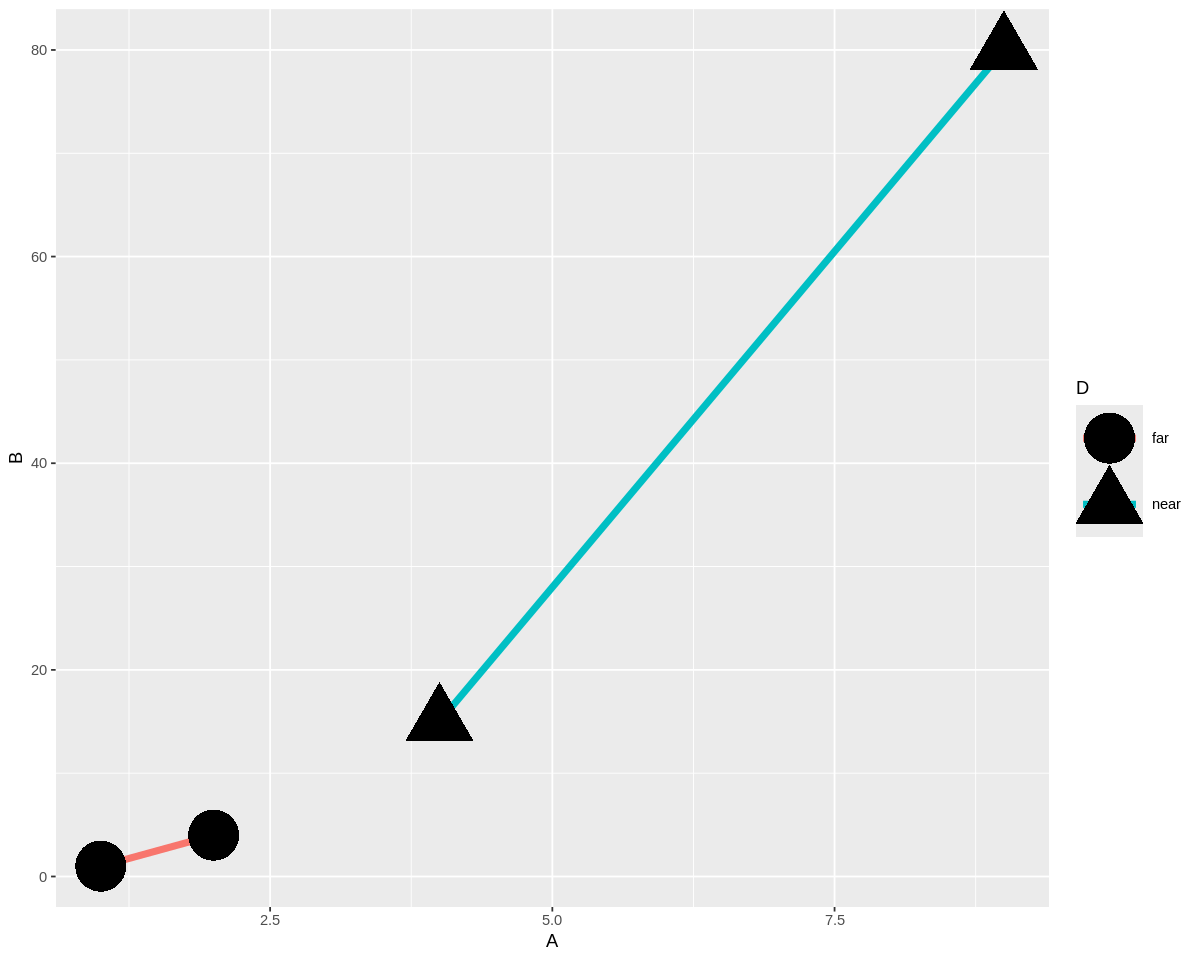

In [28]:
ggplot(data=df, aes(x=A, y=B)) +
  geom_line(aes(color=D), linewidth=2) +
  geom_point(aes(shape=D), size=14)

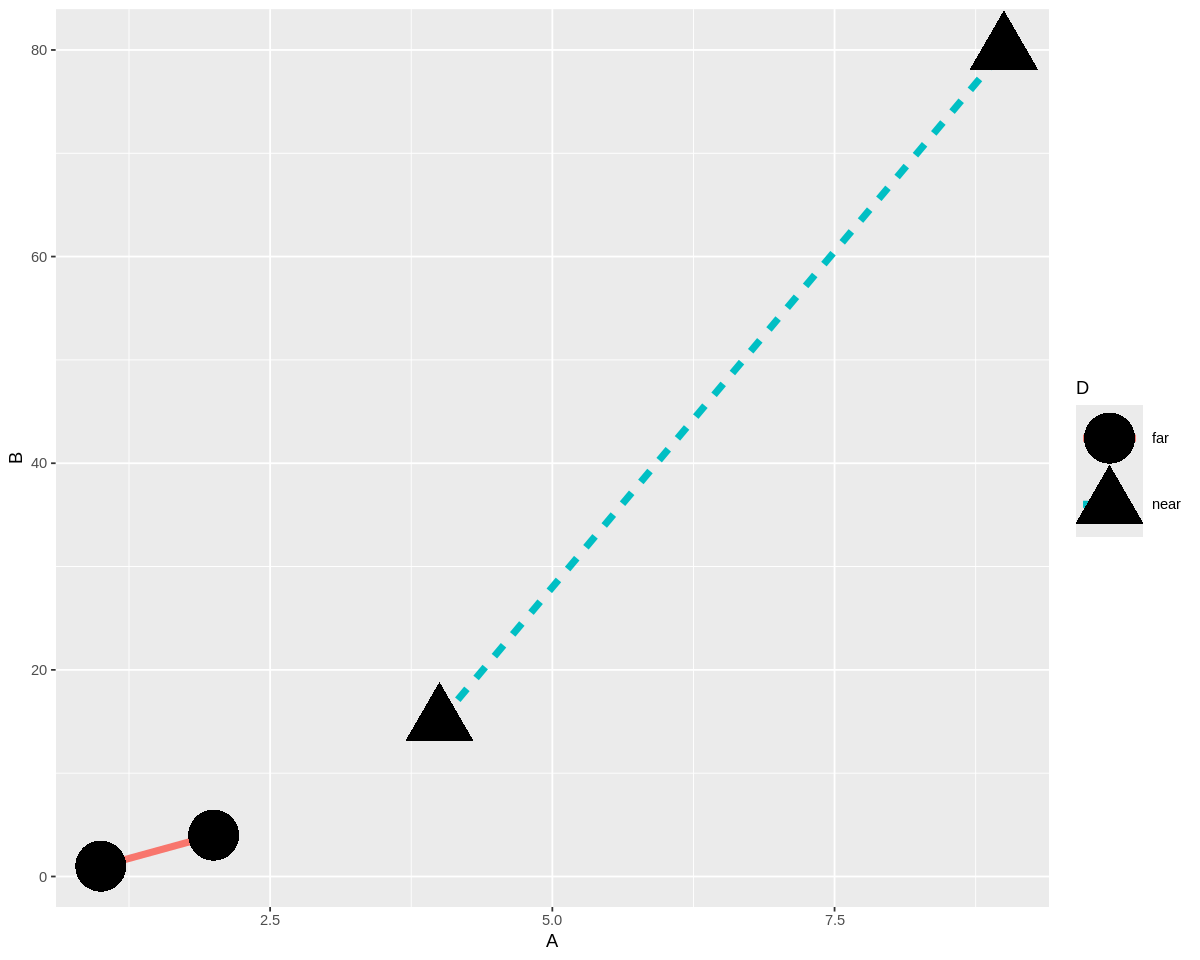

In [33]:
ggplot(data=df, aes(x=A, y=B)) +
  geom_line(aes(color=D, linetype=D), linewidth=2) +
  geom_point(aes(shape=D), size=14)

***

# `stat_summary`

Often we want geometries to represent an *aggregation* of several rows, instead of one row.  Bar graphs are a great example.  To discuss them let's read in a richer data set, World Bank data:



In [34]:
worldbank <- read.csv('https://www.dropbox.com/scl/fi/l89oln6t3bxczsiyaizo7/WorldBank-small.csv?rlkey=helgh4czldwuecbpysag2how2&dl=1')
head(worldbank)

,Country,Year,CO2,Fertility.rate,GDP.per.capita,Internet.users.per.100,Life.expectancy,Population,Region
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,1960,0.04606788,7.45,NA,NA,32.32851,8994793,Asia
2,Afghanistan,1961,0.05361494,7.45,NA,NA,32.77744,9164945,Asia
3,Afghanistan,1962,0.07378134,7.45,NA,NA,33.21990,9343772,Asia
4,Afghanistan,1963,0.07425137,7.45,NA,NA,33.65788,9531555,Asia
5,Afghanistan,1964,0.08631654,7.45,NA,NA,34.09288,9728645,Asia
6,Afghanistan,1965,0.10149861,7.45,NA,NA,34.52539,9935358,Asia


In [35]:
dim(worldbank)

[1] 11536     9

This data set has 11,536 rows, but notice what we get with a default `geom_bar` specification mapping `Region` to `x`:

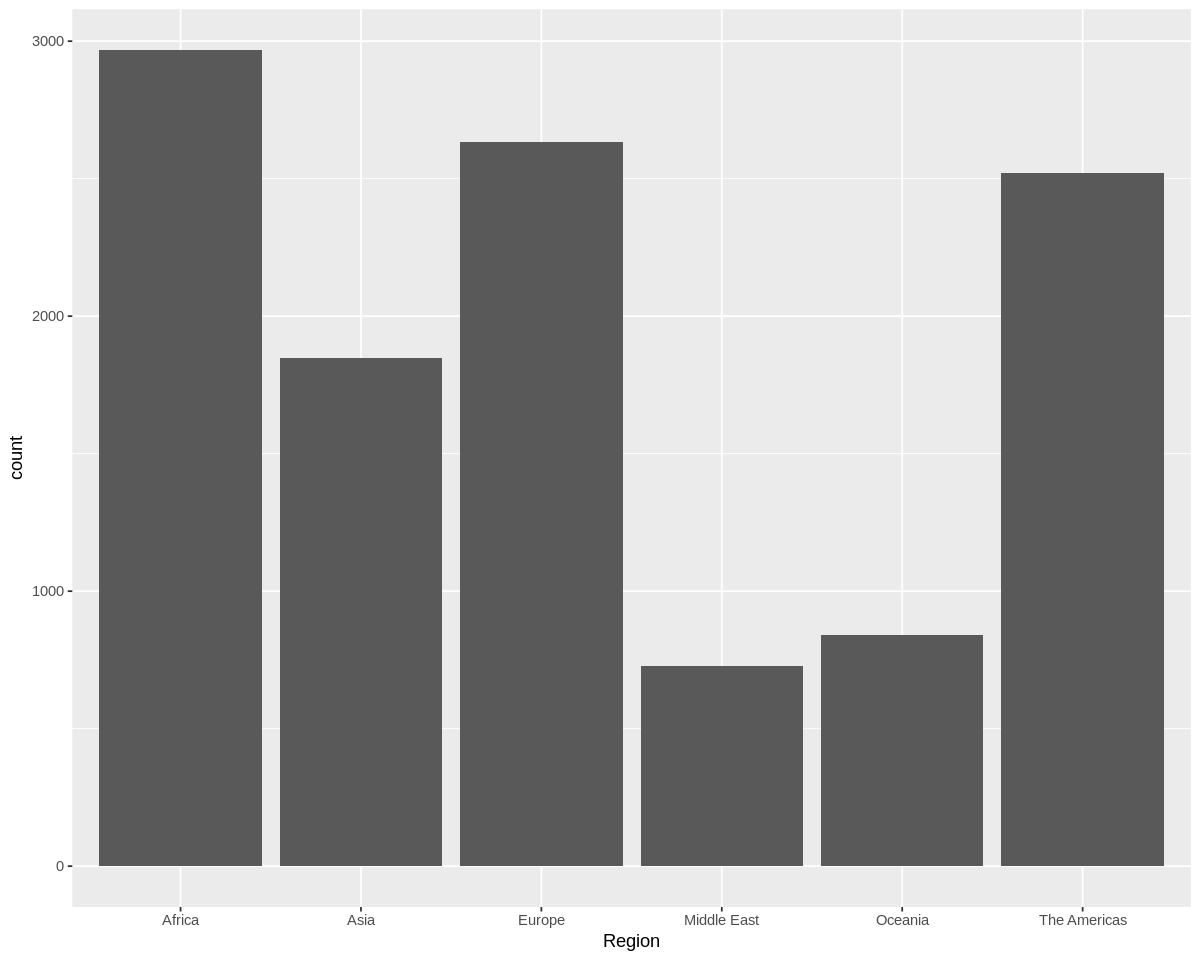

In [36]:
ggplot(data = worldbank) +
  geom_bar(aes(x = Region))

We have 7 bars, not 11,536!  This is because the Y-axis is an *aggregation*, or *summary*.  By default, the `y` scale is controlled by mapping a *count*.  The number of countries in each region is mapped to the Y-axis.  It's the same as if we had specified:

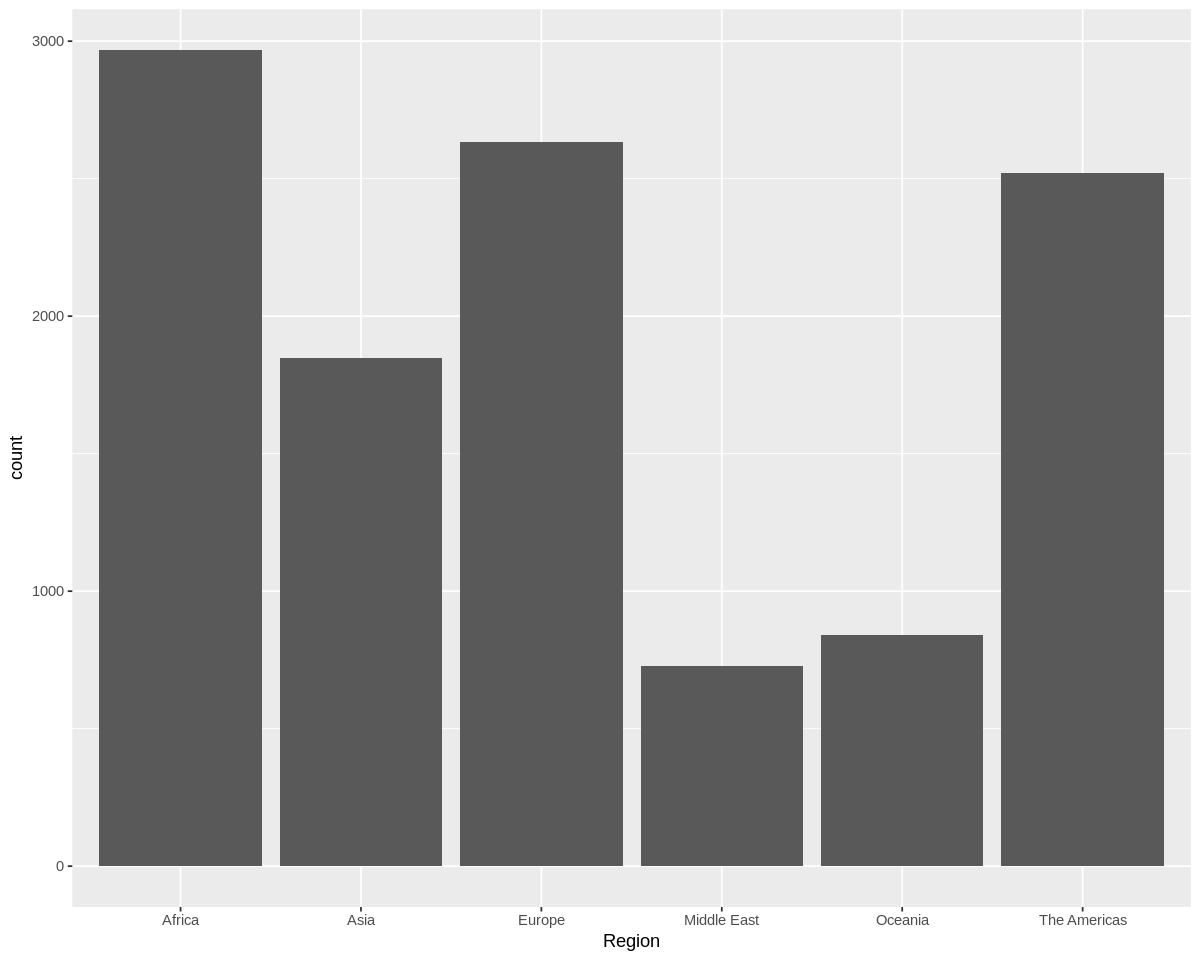

In [37]:
ggplot(data = worldbank) +
  geom_bar(aes(x = Region, y = after_stat(count)))

What if we wanted the summarize the mean life expectancy by region, instead of the count of countries? To instead map the mean life expectancy we need to specify that the Y-axis is a `'summary'` stat, and which function we want to use to summarize:

Warning message:
“Removed 1037 rows containing non-finite outside the scale range
(`stat_summary()`).”


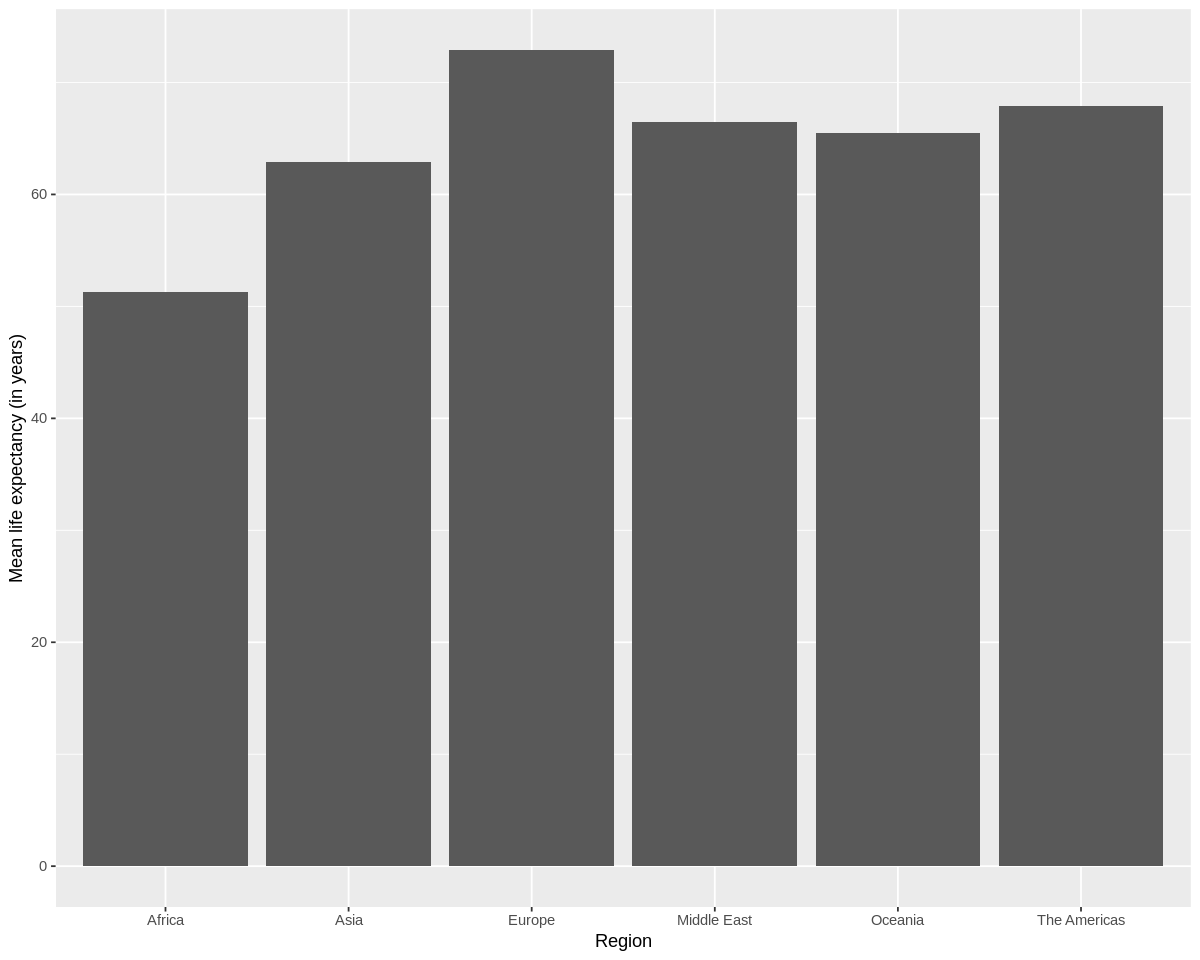

In [38]:
ggplot(data = worldbank) +
  geom_bar(aes(x = Region, y = Life.expectancy), stat = 'summary', fun = 'mean') +
    ylab('Mean life expectancy (in years)')

There's actually a more flexible way to go about this which involves the `stat_summary` command.  In addition to specifying the aesthetic mapping with `aes()`, we must specify the `fun=` and `geom=` command which respectively specify the summary (aggregation) method we want to use, and the geometry to represent each aggregation:

Warning message:
“Removed 1037 rows containing non-finite outside the scale range
(`stat_summary()`).”


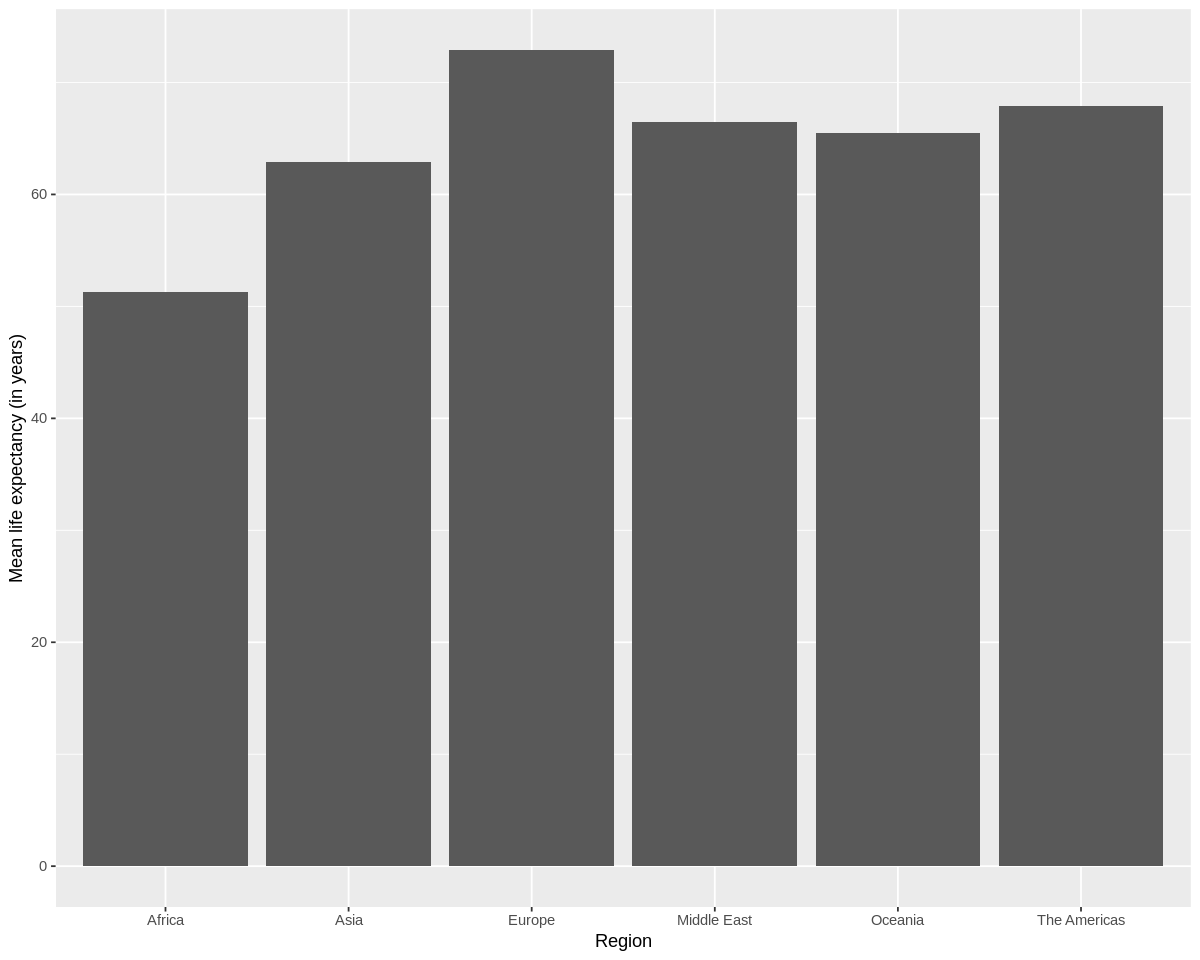

In [39]:
ggplot(data = worldbank) +
  stat_summary(aes(x = Region, y = Life.expectancy), fun = 'mean', geom = 'bar') +
    ylab('Mean life expectancy (in years)')

This method allows us to represent aggregations with geometries beyond just bars, e.g.:

Warning message:
“Removed 1037 rows containing non-finite outside the scale range
(`stat_summary()`).”


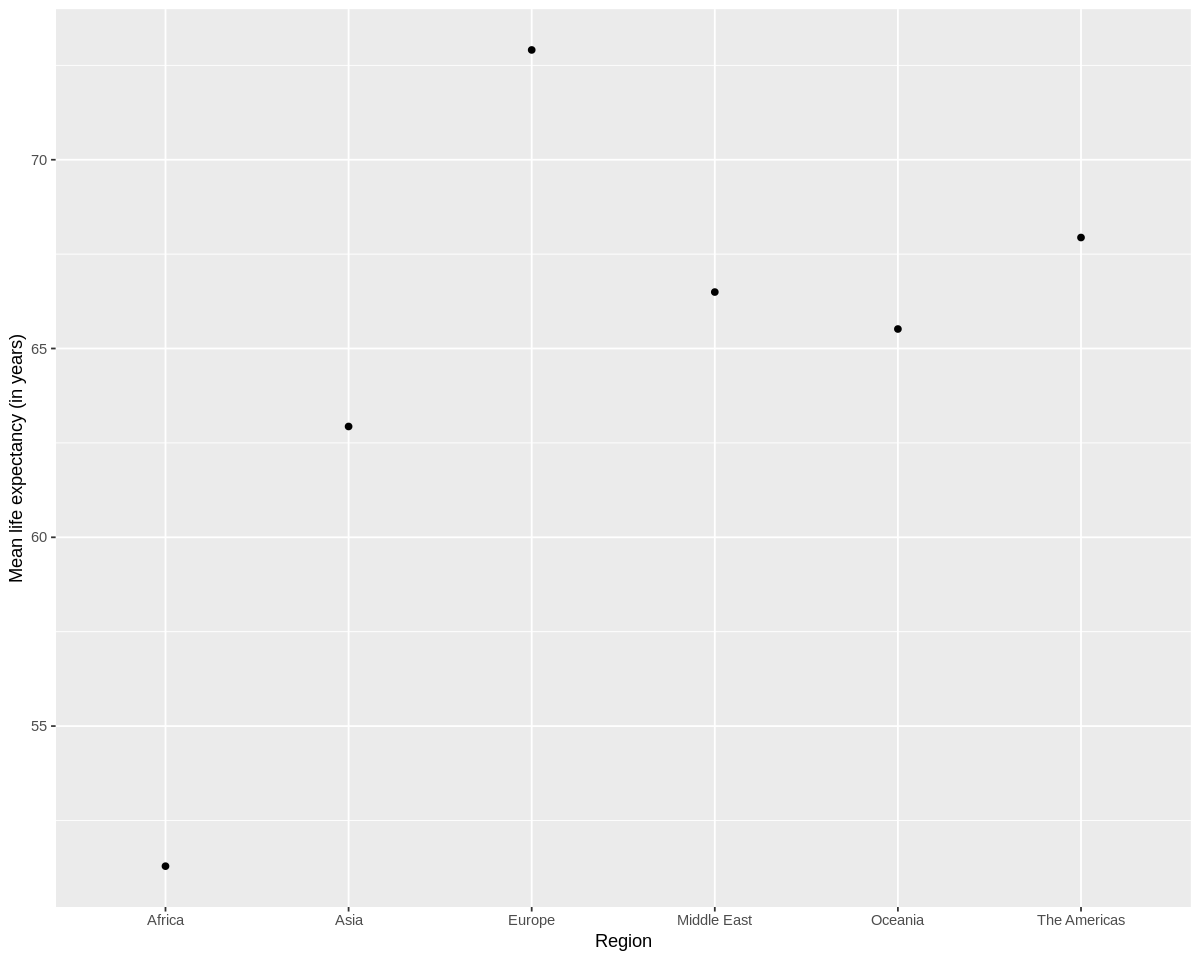

In [40]:
ggplot(data = worldbank) +
  stat_summary(aes(x = Region, y = Life.expectancy), fun = 'mean', geom = 'point') +
    ylab('Mean life expectancy (in years)')

This allows us to get creative:

Warning message:
“Removed 1037 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 1037 rows containing non-finite outside the scale range
(`stat_summary()`).”


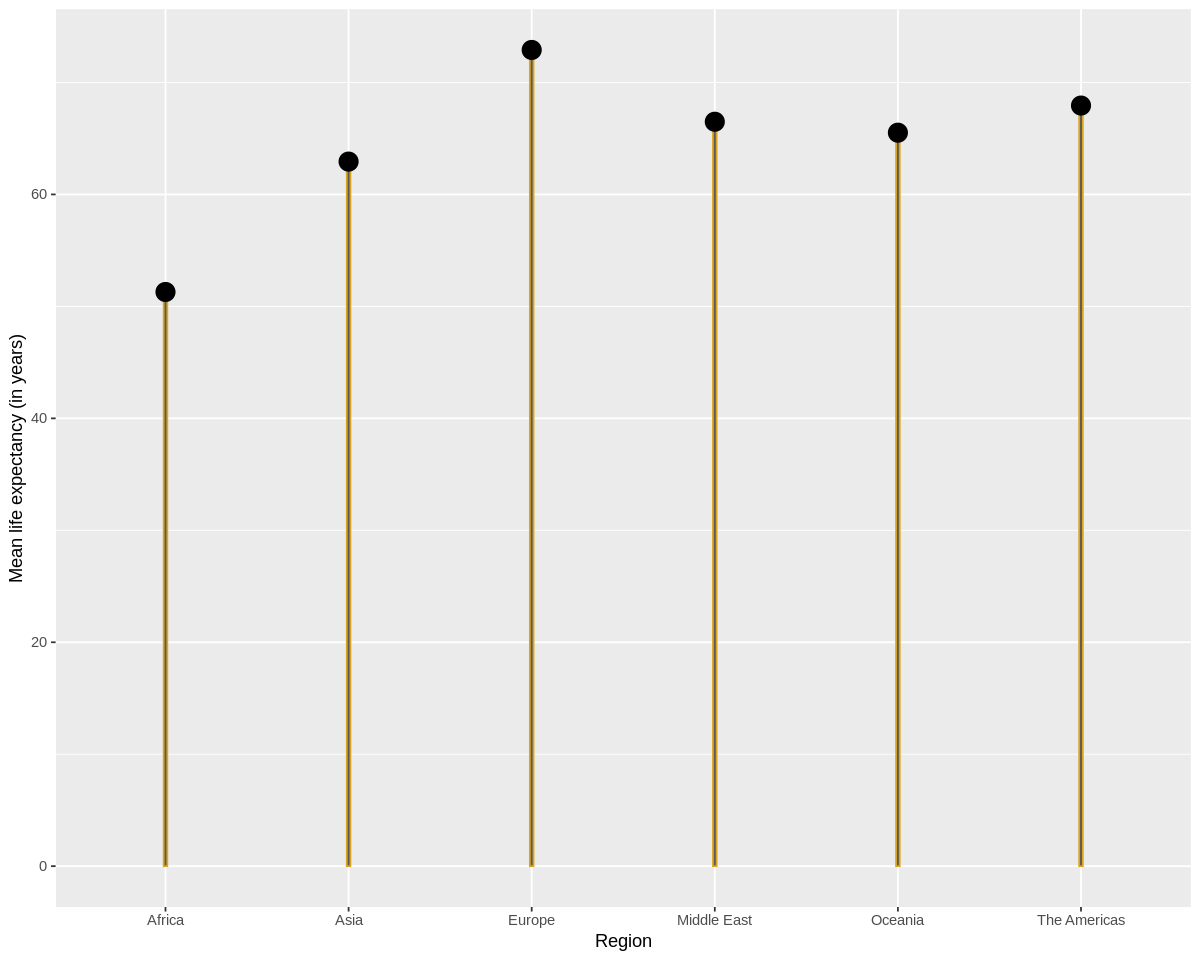

In [41]:
ggplot(data = worldbank) +
  stat_summary(aes(x = Region, y = Life.expectancy), fun = 'mean', geom = 'bar', width = 0.02, col='goldenrod') +
  stat_summary(aes(x = Region, y = Life.expectancy), fun = 'mean', geom = 'point', size = 5) +
    ylab('Mean life expectancy (in years)')

# Facets

Facets are an important way to reduce clutter.  A *facet* is simply a set of "small multiples,"  the same graph that appears in separate panes by one or more grouping variables.  

To motivate, consider the following graph of CO2 emissions in metric tons per capita over time for European countries:

In [42]:
library(dplyr)
europe <- (worldbank
    %>% filter(Region=='Europe')
    %>%  mutate(Country = factor(Country))
)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Warning message:
“Removed 1016 rows containing missing values or values outside the scale range
(`geom_line()`).”


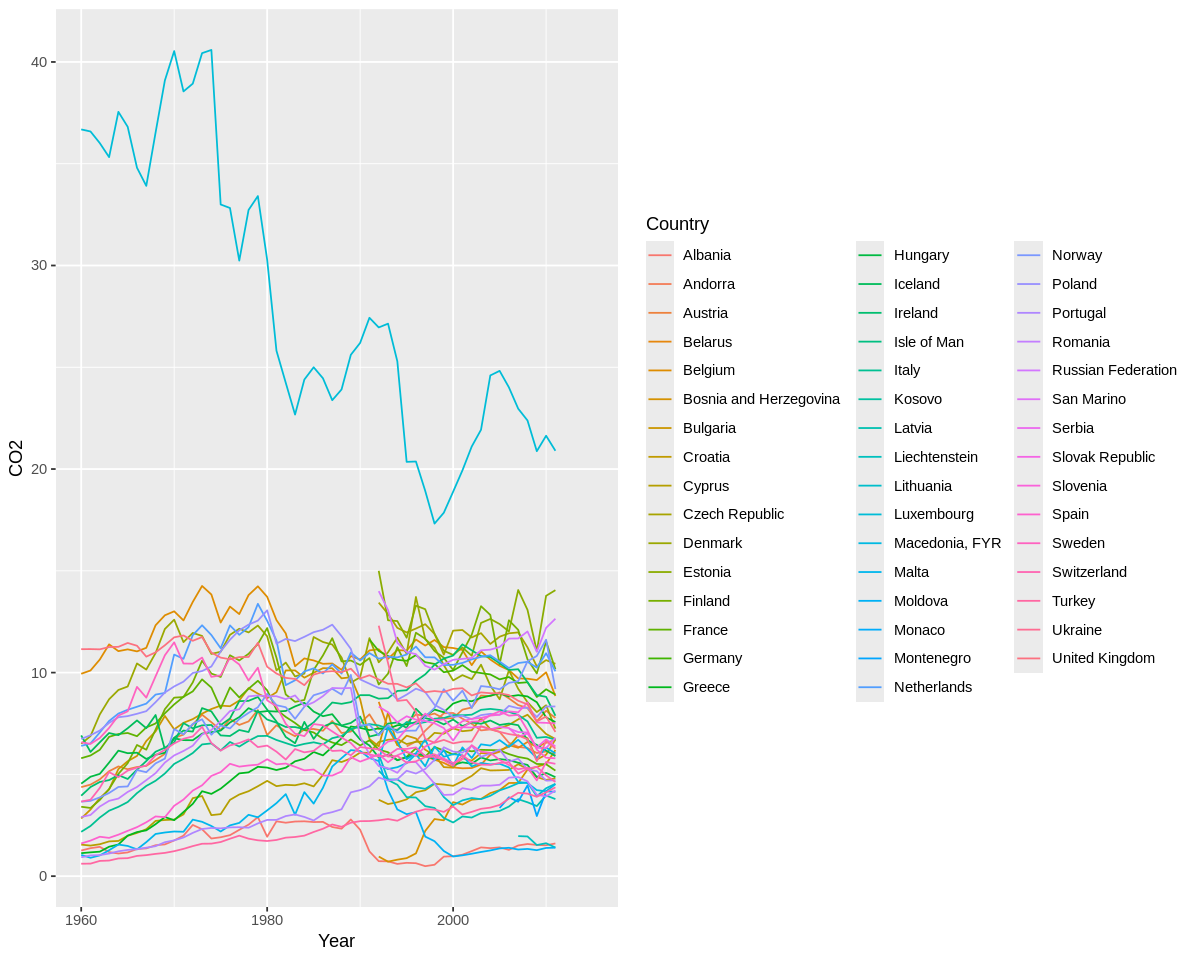

In [43]:
ggplot(data = europe) +
  geom_line(aes(x = Year, y = CO2, color = Country))

A hot mess!!  There are too many countries to represent with color, which forces too many countries to have similar colors (e.g. Spain and Sweden).  We can instead facet by country which produces a much more legible plot:

Warning message:
“Removed 1016 rows containing missing values or values outside the scale range
(`geom_line()`).”


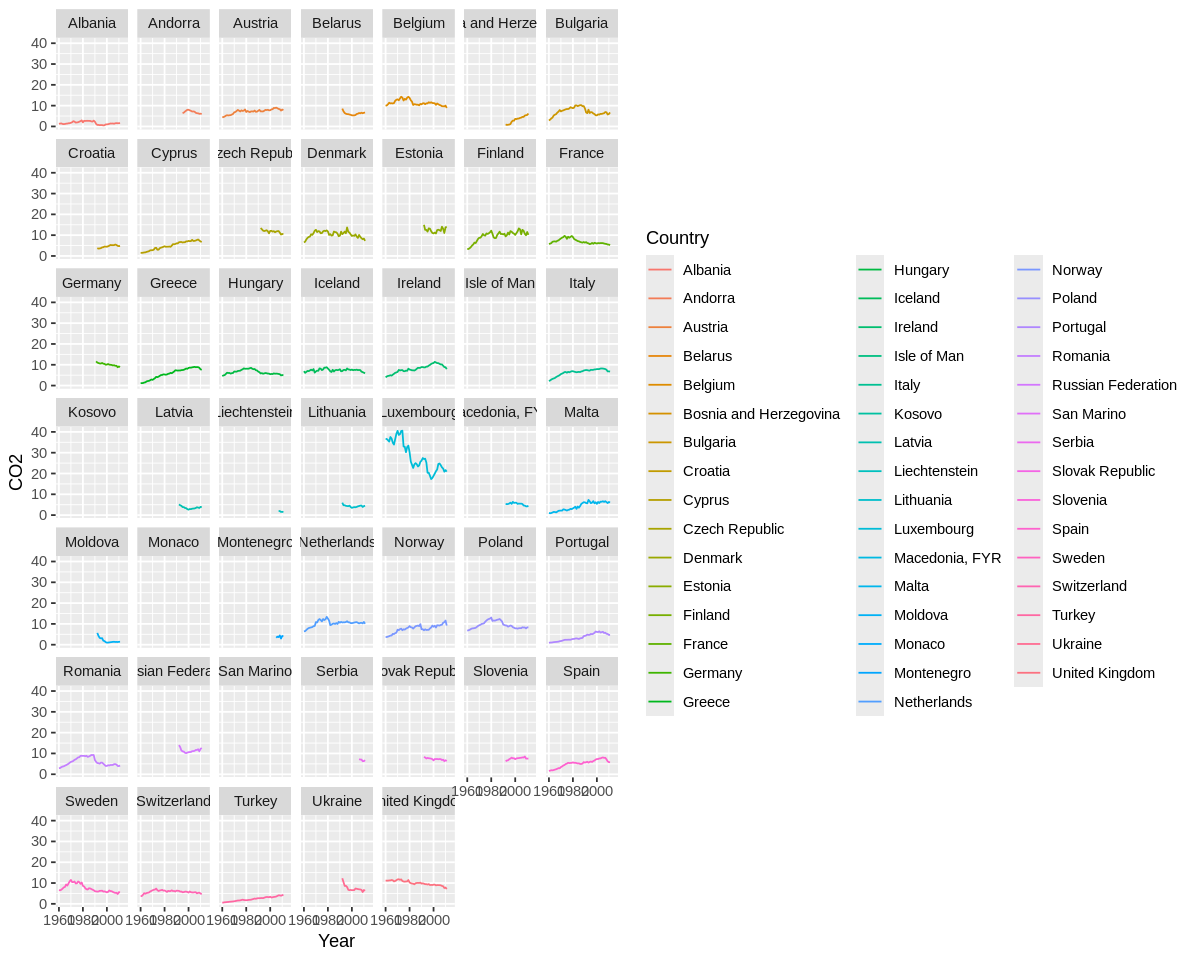

In [44]:
ggplot(data = europe) +
  geom_line(aes(x = Year, y = CO2, color = Country)) +
  facet_wrap(~Country)

Since we no longer need the colors we can omit the color legend which takes up quite a bit of unnecessary space, and clean up the Y-axis label:

Warning message:
“Removed 1016 rows containing missing values or values outside the scale range
(`geom_line()`).”


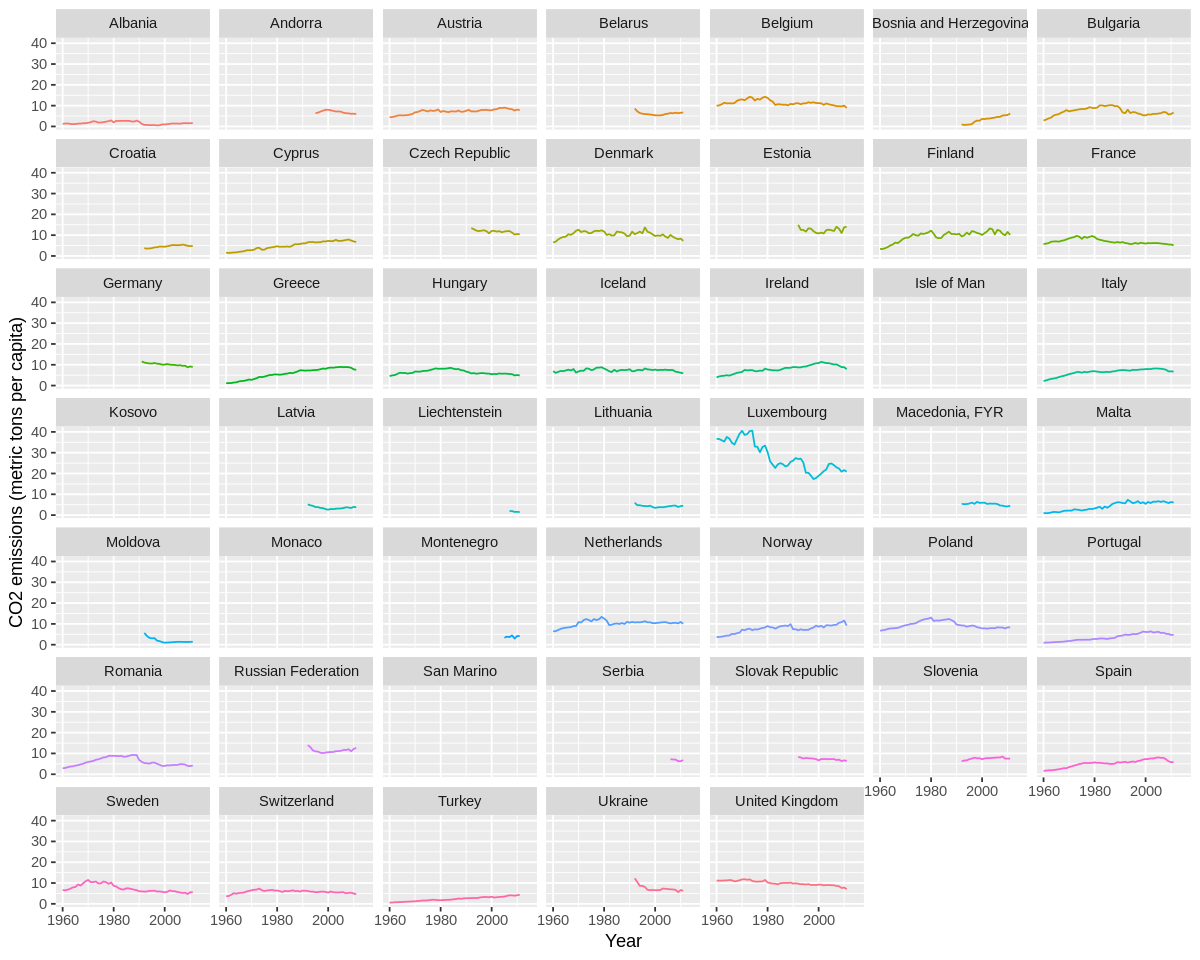

In [45]:
ggplot(data = europe) +
  geom_line(aes(x = Year, y = CO2, color = Country)) +
  facet_wrap(~Country) +
  guides(color='none') +
  ylab('CO2 emissions (metric tons per capita)')

By default, facets are alphabetical.  It would be better to have the ordering be more data-based, e.g. by the median CO2 emissions in each country.  The `reorder()` function works on factors by reordering the levels of the factor by an aggregation of a 2nd variable.  Note the current level ordering:

In [46]:
levels(europe$Country)

[1] "Albania"                "Andorra"                "Austria"               
 [4] "Belarus"                "Belgium"                "Bosnia and Herzegovina"
 [7] "Bulgaria"               "Croatia"                "Cyprus"                
[10] "Czech Republic"         "Denmark"                "Estonia"               
[13] "Finland"                "France"                 "Germany"               
[16] "Greece"                 "Hungary"                "Iceland"               
[19] "Ireland"                "Isle of Man"            "Italy"                 
[22] "Kosovo"                 "Latvia"                 "Liechtenstein"         
[25] "Lithuania"              "Luxembourg"             "Macedonia, FYR"        
[28] "Malta"                  "Moldova"                "Monaco"                
[31] "Montenegro"             "Netherlands"            "Norway"                
[34] "Poland"                 "Portugal"               "Romania"               
[37] "Russian Federation"     "San Marino"             "Serbia"                
[40] "Slovak Republic"        "Slovenia"               "Spain"                 
[43] "Sweden"                 "Switzerland"            "Turkey"                
[46] "Ukraine"                "United Kingdom"

Reordering the levels by median CO2 emissions:

In [47]:
europe <- (europe
  %>% mutate(Country = reorder(Country, CO2, FUN = median, na.rm=TRUE, decreasing = TRUE))
  )

In [48]:
levels(europe$Country)

[1] "Luxembourg"             "Estonia"                "Czech Republic"        
 [4] "Russian Federation"     "Belgium"                "Netherlands"           
 [7] "Denmark"                "Finland"                "Germany"               
[10] "United Kingdom"         "Poland"                 "Ireland"               
[13] "Norway"                 "Slovenia"               "Austria"               
[16] "Iceland"                "Slovak Republic"        "Andorra"               
[19] "Serbia"                 "Bulgaria"               "Ukraine"               
[22] "Sweden"                 "Italy"                  "France"                
[25] "Belarus"                "Hungary"                "Greece"                
[28] "Switzerland"            "Spain"                  "Macedonia, FYR"        
[31] "Romania"                "Cyprus"                 "Croatia"               
[34] "Lithuania"              "Malta"                  "Montenegro"            
[37] "Bosnia and Herzegovina" "Latvia"                 "Portugal"              
[40] "Turkey"                 "Liechtenstein"          "Albania"               
[43] "Moldova"                "Isle of Man"            "Kosovo"                
[46] "Monaco"                 "San Marino"

Now when we re-plot the facets they will be ordered by median CO2 emissions:

Warning message:
“Removed 1016 rows containing missing values or values outside the scale range
(`geom_line()`).”


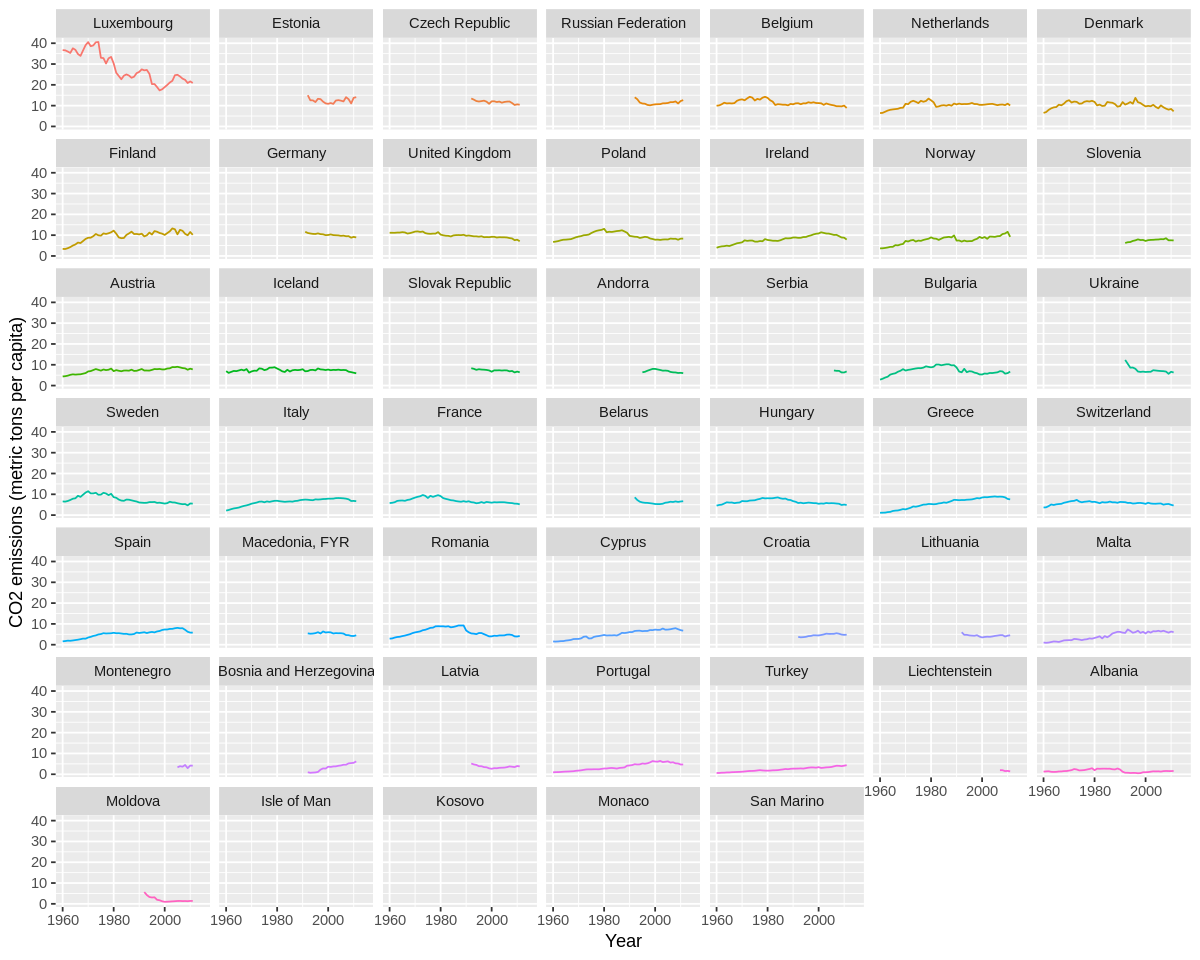

In [49]:
ggplot(data = europe) +
  geom_line(aes(x = Year, y = CO2, color = Country)) +
  facet_wrap(~Country) +
  guides(color='none') +
  ylab('CO2 emissions (metric tons per capita)')

***

## **Task**

Re-create the plot below, showing how life expectancy has changed over time.  Each individual line represents one country (hint: there's a `group = ` aesthetic available for `line` geometries). Note that the lines are semi-transparent; Google how to do this! (Hint: it's a modification to the `geom_point()` command).  The facets are ordered by mean life expectancy over time for each region. The thick black line represents the mean life expectancy of each region over time.  

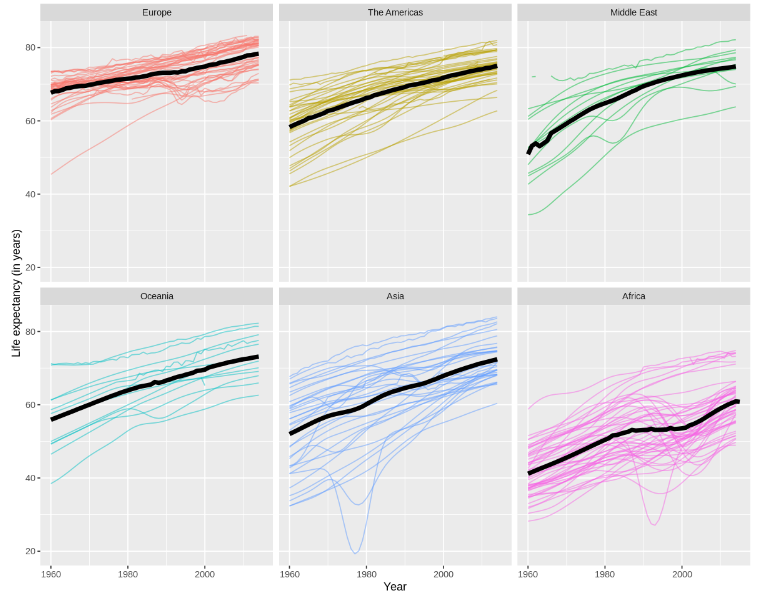

In [55]:
worldbank %>% head

,Country,Year,CO2,Fertility.rate,GDP.per.capita,Internet.users.per.100,Life.expectancy,Population,Region
,<chr>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
1,Afghanistan,1960,0.04606788,7.45,NA,NA,32.32851,8994793,Asia
2,Afghanistan,1961,0.05361494,7.45,NA,NA,32.77744,9164945,Asia
3,Afghanistan,1962,0.07378134,7.45,NA,NA,33.21990,9343772,Asia
4,Afghanistan,1963,0.07425137,7.45,NA,NA,33.65788,9531555,Asia
5,Afghanistan,1964,0.08631654,7.45,NA,NA,34.09288,9728645,Asia
6,Afghanistan,1965,0.10149861,7.45,NA,NA,34.52539,9935358,Asia


Warning message:
“Removed 1037 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 925 rows containing missing values or values outside the scale range
(`geom_line()`).”


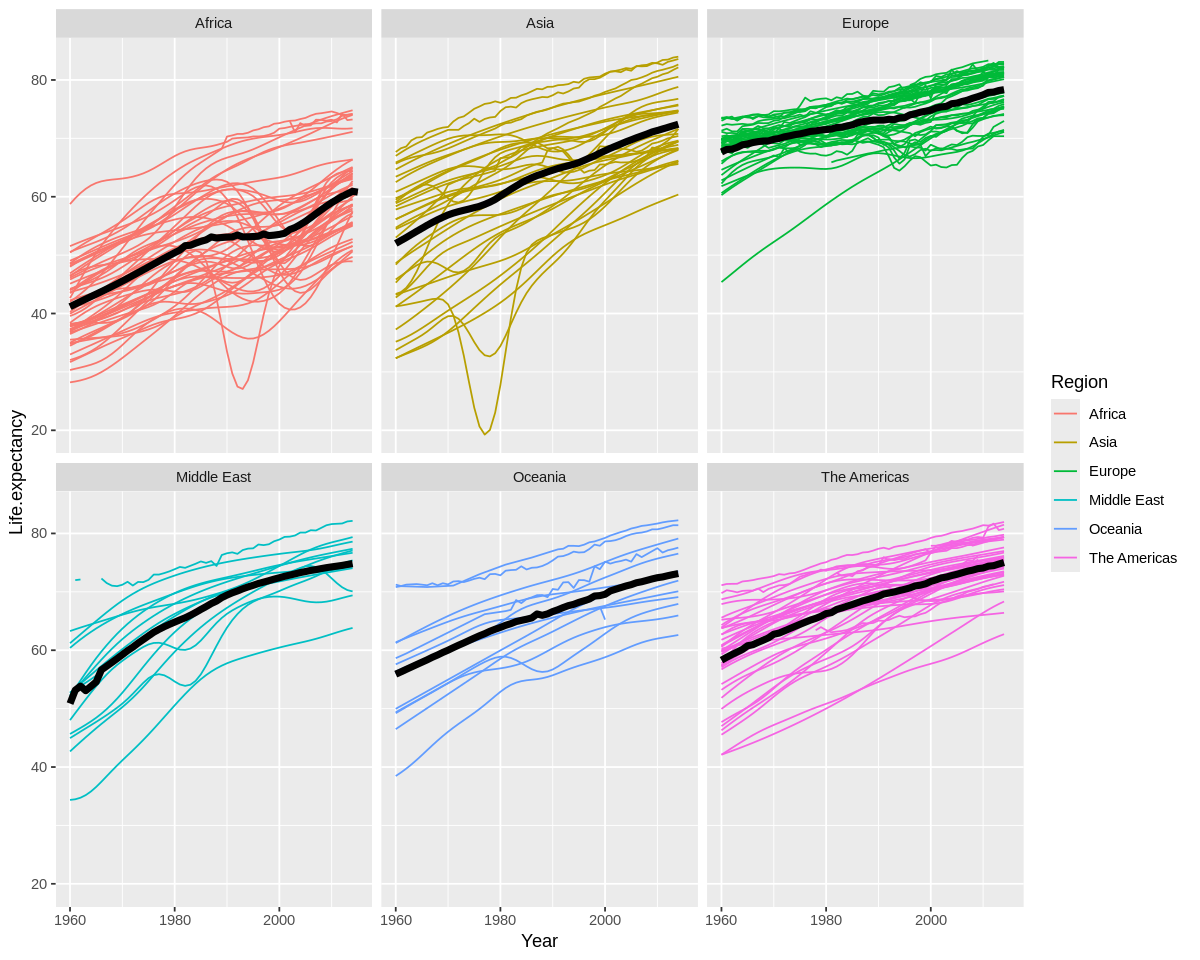

In [66]:
ggplot(data=worldbank) +
  geom_line(aes(x=Year, y=Life.expectancy, color=Region, group=Country)) +
  stat_summary(aes(x=Year, y=Life.expectancy), fun = 'mean', geom = 'line', size = 2) +
  facet_wrap(~Region)

In [70]:
# changing the order of 'Region' based on Life.expectancy
worldbank <- (worldbank
  %>% mutate(Region = reorder(Region, Life.expectancy, FUN = mean, na.rm=TRUE, decreasing = TRUE))
)

In [69]:
levels(worldbank$Region)

[1] "Europe"       "The Americas" "Middle East"  "Oceania"      "Asia"        
[6] "Africa"

Warning message:
“Removed 1037 rows containing non-finite outside the scale range
(`stat_summary()`).”
Warning message:
“Removed 925 rows containing missing values or values outside the scale range
(`geom_line()`).”


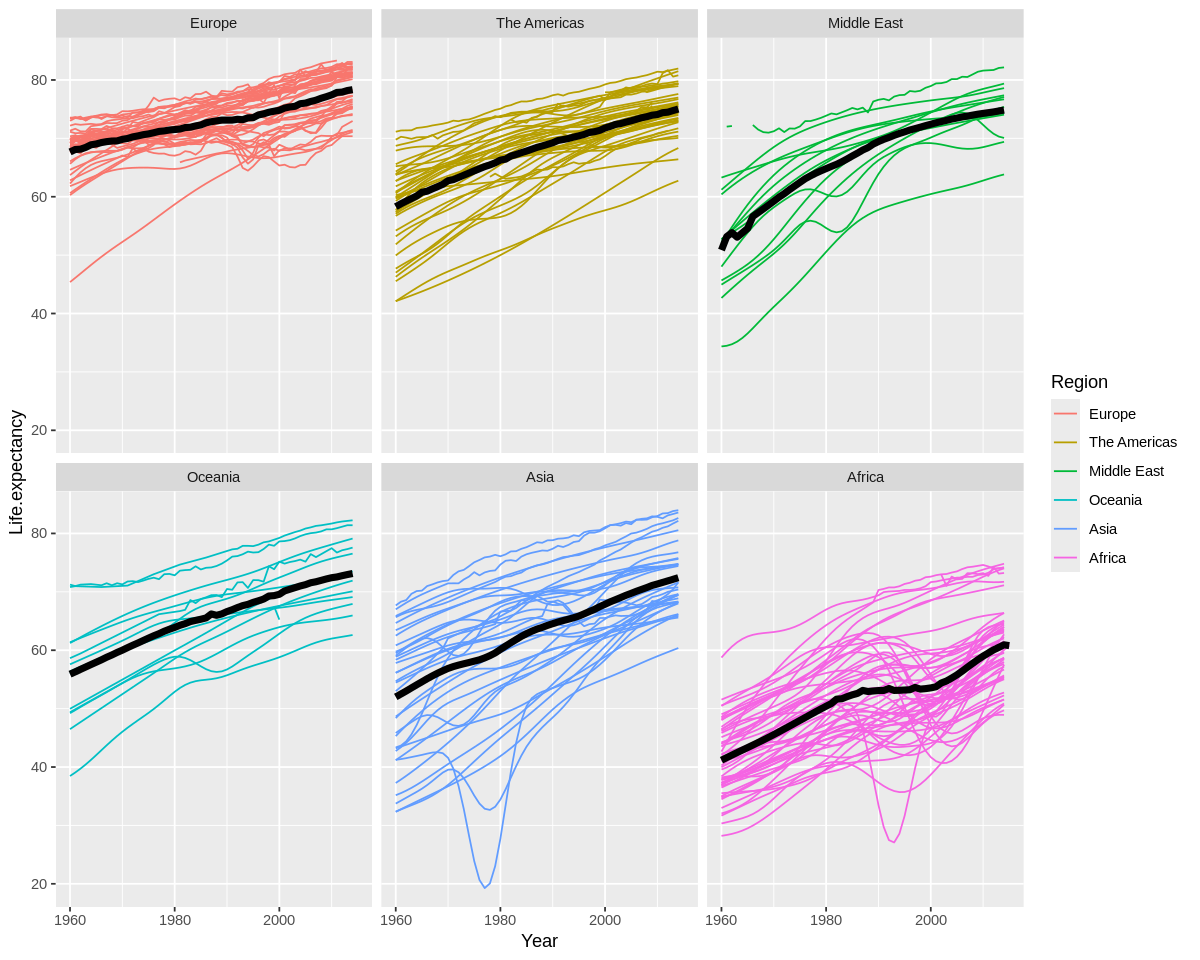

In [68]:
ggplot(data=worldbank) +
  geom_line(aes(x=Year, y=Life.expectancy, color=Region, group=Country)) +
  stat_summary(aes(x=Year, y=Life.expectancy), fun = 'mean', geom = 'line', size = 2) +
  facet_wrap(~Region)

***

If we have two grouping variables, we can use `facet_grid()` to set up a grid of facets.  For example suppose we want to see how the relationship between CO2 emissions and life expectancy has changed for each `Region`, for each `Year`, filtering for simplicity to just the years 1990, 2000, and 2010:

In [72]:
worldbank.3years <- (worldbank
      %>% filter(Year %in% c(1990, 2000, 2010))
      %>% mutate(Year = factor(Year))
      )

Warning message:
“Removed 42 rows containing missing values (`geom_point()`).”


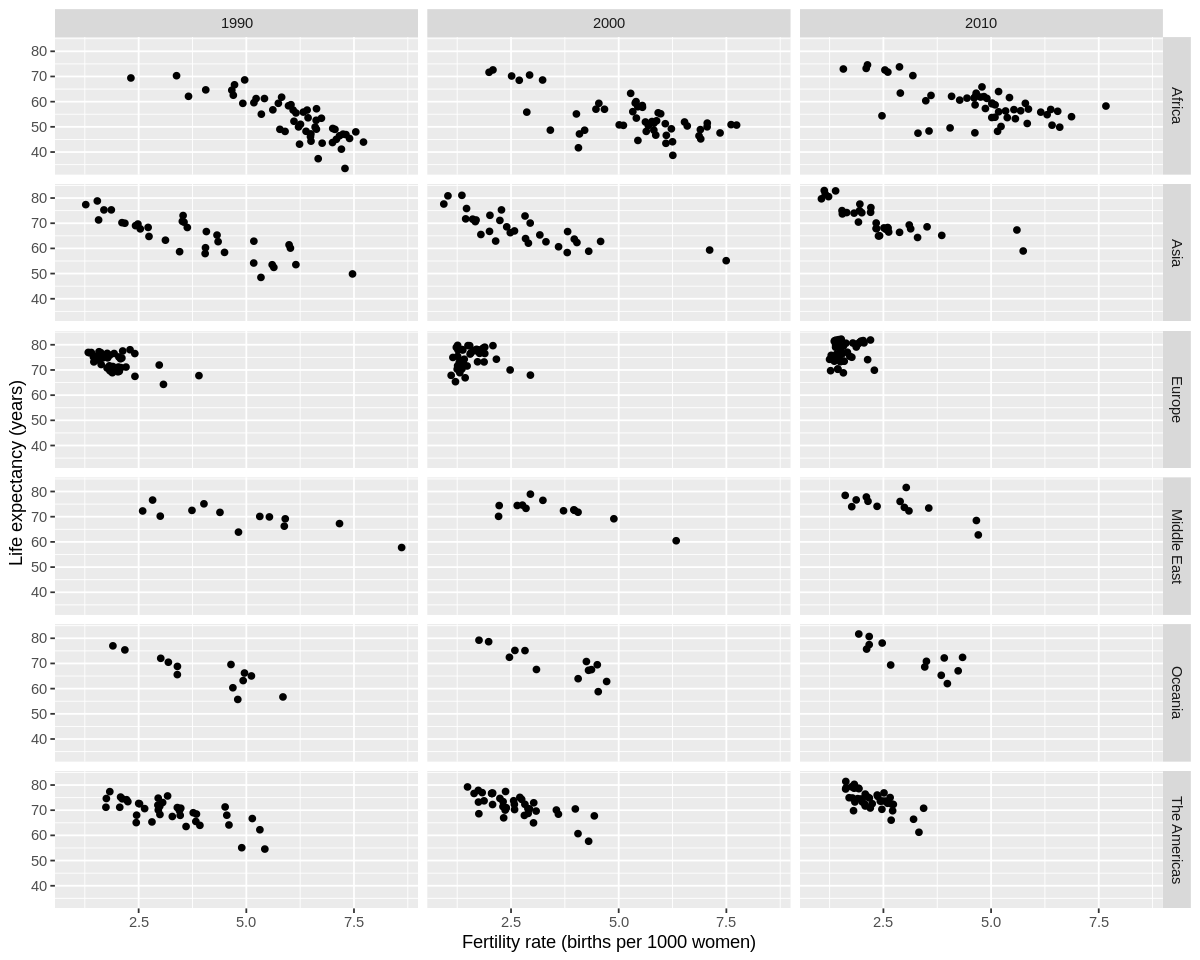

In [ ]:
ggplot(data = worldbank.3years) +
  geom_point(aes(x = Fertility.rate, y = Life.expectancy)) +
    facet_grid(Region~Year) +
      xlab('Fertility rate (births per 1000 women)') +
        ylab('Life expectancy (years)')

What happens if we rearrange the order with `facet_grid(Year~Region)`?  Modify the code and try it out!

# Themes

Non-data-related modifications to your graph are controlled by *themes*.  Think: background color; grid lines; axis title font sizes/colors; etc.  If you are familiar with Tableau, the `themes()` command is like the Format pane.  It's how you change all aspects of your graph *not* related to data-mapped geometries.  

There are several "pre-packaged" themes that change the appearance of your graph from the default "grey background/white grid lines."  These are `theme_bw()` and `theme_classic()`; [there are others as well](https://ggplot2.tidyverse.org/reference/ggtheme.html).  Notice how these change non-data elements of the graph:

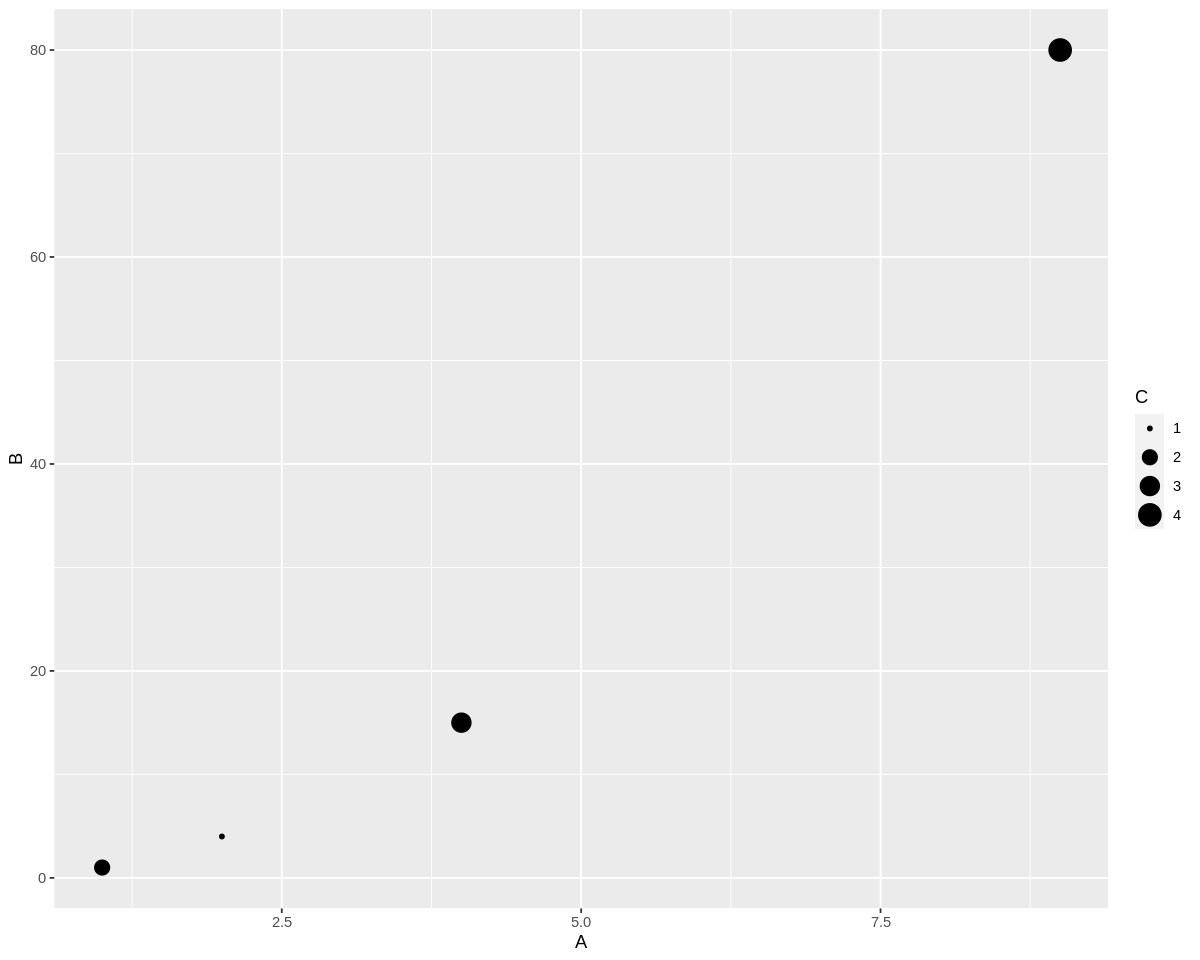

In [ ]:
ggplot(data = df) +
  geom_point(aes(x = A,y=B, size = C))

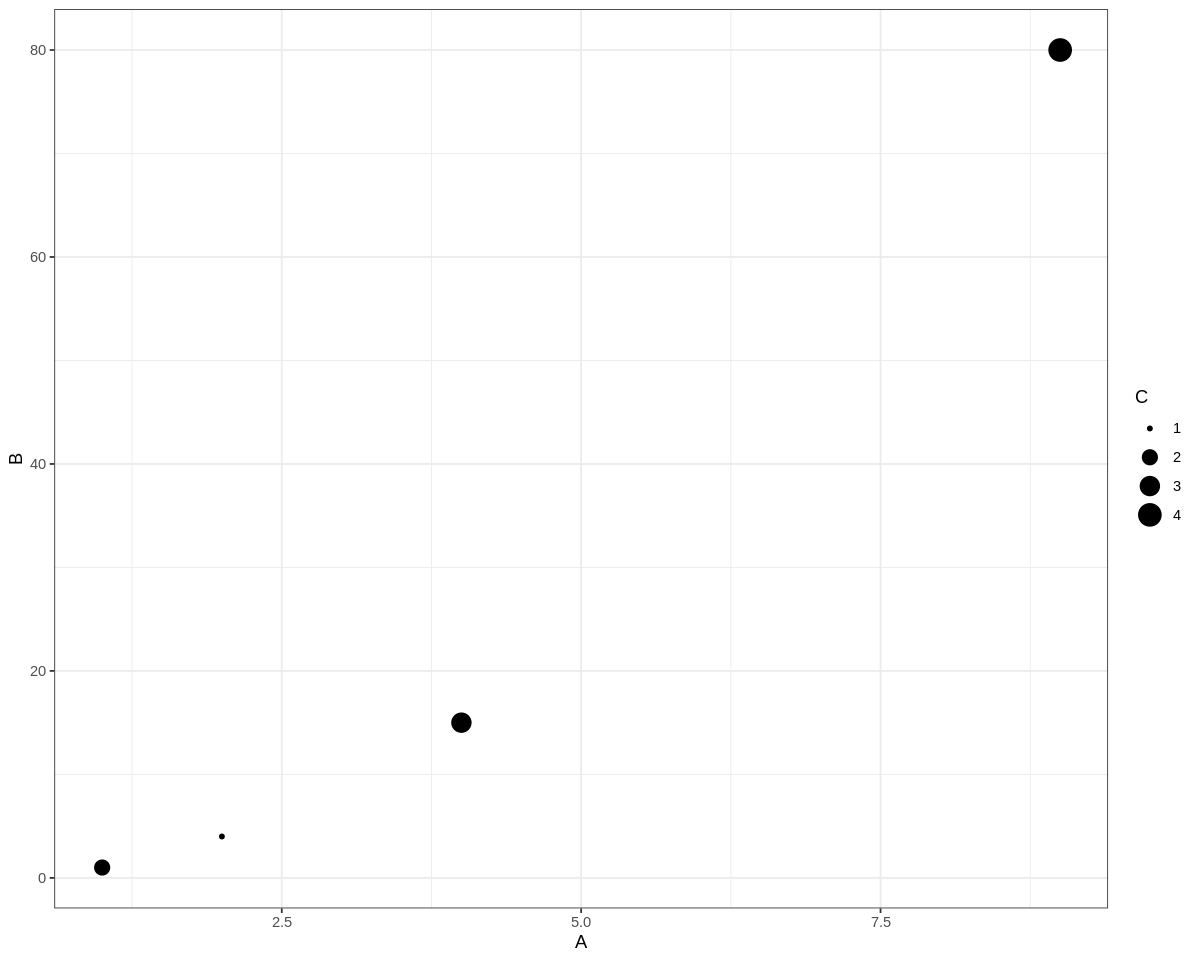

In [ ]:
ggplot(data = df) +
  geom_point(aes(x = A,y=B, size = C)) +
    theme_bw()

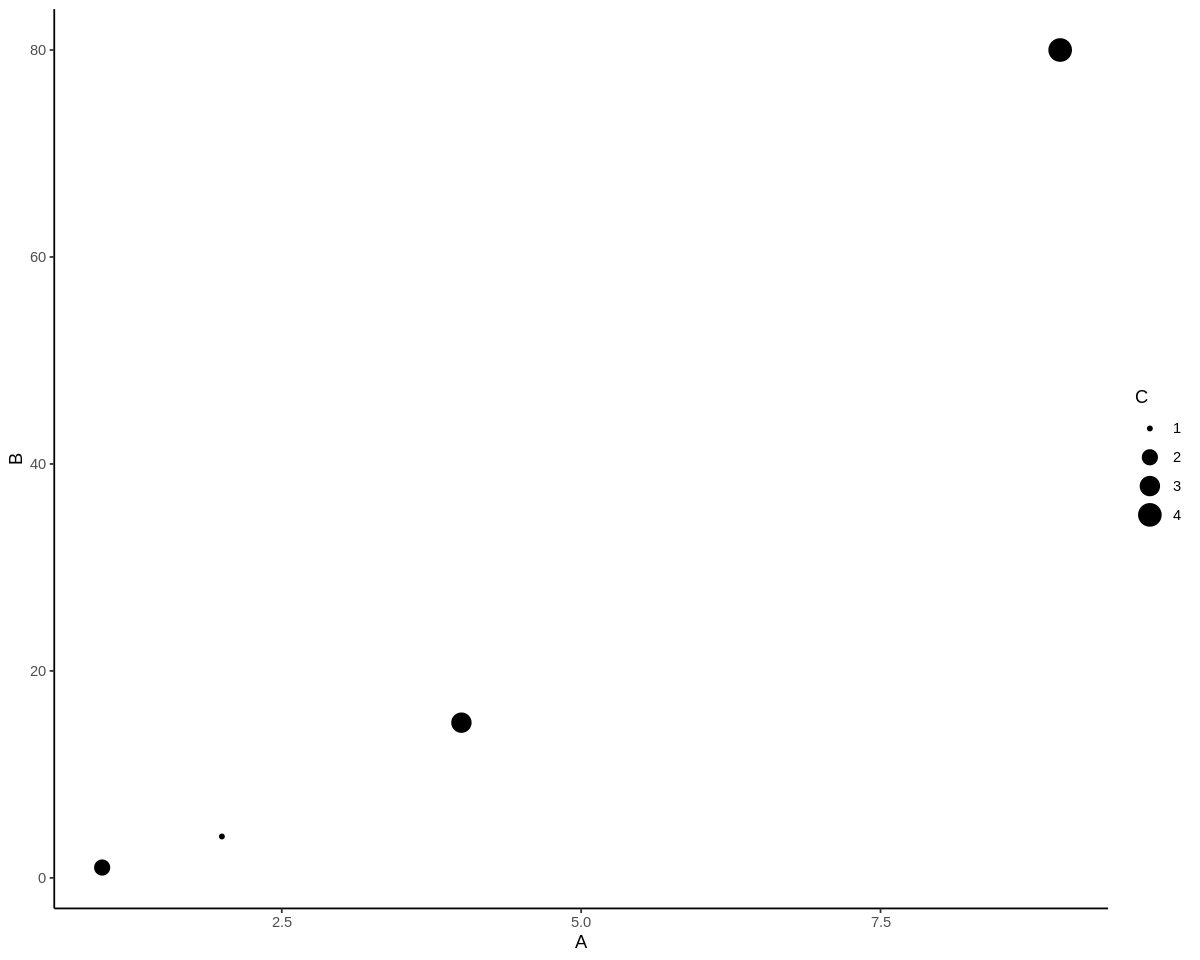

In [ ]:
ggplot(data = df) +
  geom_point(aes(x = A,y=B, size = C)) +
    theme_classic()

To move beyond the pre-packaged themes to have finer control, we use the `theme()` function.  Common aspects of the graph we can change with `theme()` include:

* `axis.text`
* `panel.grid`
* `legend.title`
* `axis.ticks`

There are lots more; see the `?theme` help file.  Modifying a theme comes by way of specifying the `element_` from which the theme is defined.  Available elements include:

* `element_text()`
* `element_rect()`
* `element_line()`
* `element_blank()`

For example, to modify `axis.text` we specify aspects of `element_text()`; to modify `panel.grid` or `axis.ticks` we specify aspects of `element_line()`; to modify `panel.background` we specify aspects of `element_rect`, etc.  If you want something to disappear, use `element_blank()`. Take a look at the code below:

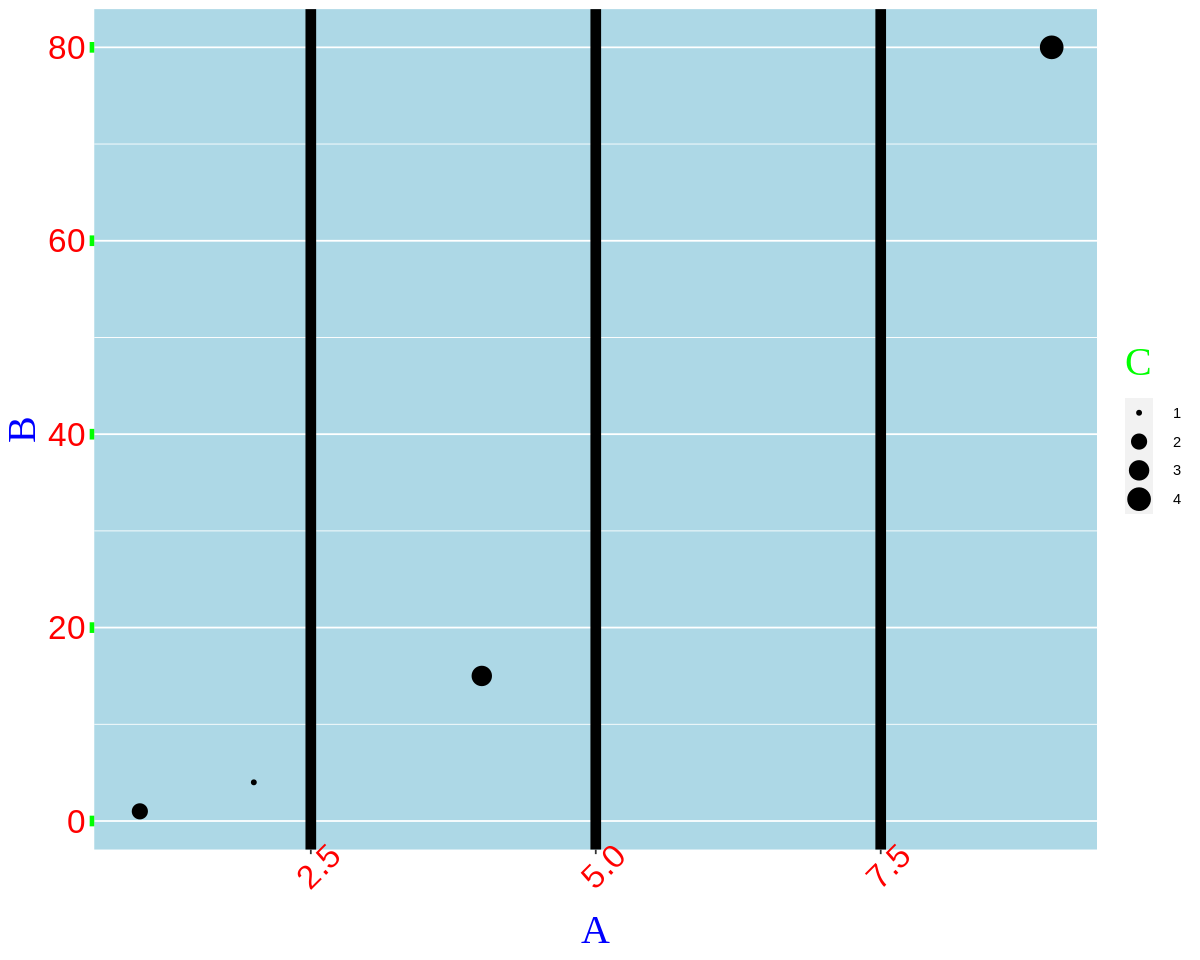

In [ ]:
ggplot(data = df) +
  geom_point(aes(x = A,y=B, size = C)) +
  theme(axis.text = element_text(size = 20, color = 'red'),
        axis.title = element_text(size = 24, color = 'blue', family='Times'),
        axis.text.x = element_text(angle = 45),
        legend.title = element_text(size = 24, color = 'green', family='Times'),
        panel.grid.major.x = element_line(color='black', linewidth = 3),
        panel.grid.minor.x = element_blank(),
        panel.background = element_rect(fill='lightblue'),
        axis.ticks.y = element_line(linewidth = 3, color = 'green'))

# When in doubt, just Google!

This notebook just scratches the surface of using ggplot.  There is a lot more functionality that you need to just discover by using it!  Whenever you need to figure out "how to do something in `ggplot2`", a great idea is to Google it.


***

## **Task**


In the next task, use the `worldbank.3years` data set to recreate the boxplots of fertility rate over 20 years by region, with the country-specific points added on with some jitter.  Make the points semi-transparent.  Don't know how to make points transparent? Don't know how to jitter?    Google it!  (I actually had to Google how to jitter, since I forgot how to do it.)

Also try out your formatting chops with `theme` and the `element_*()` functions; make good use of the `?theme` help file here:

* Light grey horizontal grid lines at major tick marks only
* No vertical grid lines
* Light blue facet box backgrounds
* Black, size-18 axis text font
* Black, size-24 axis title font
* Size-14 facet label font for the Regions
* White background
* Light grey borders (hint: use `panel.border`, and see the `?theme` help file to make sure you don't have any fill!)

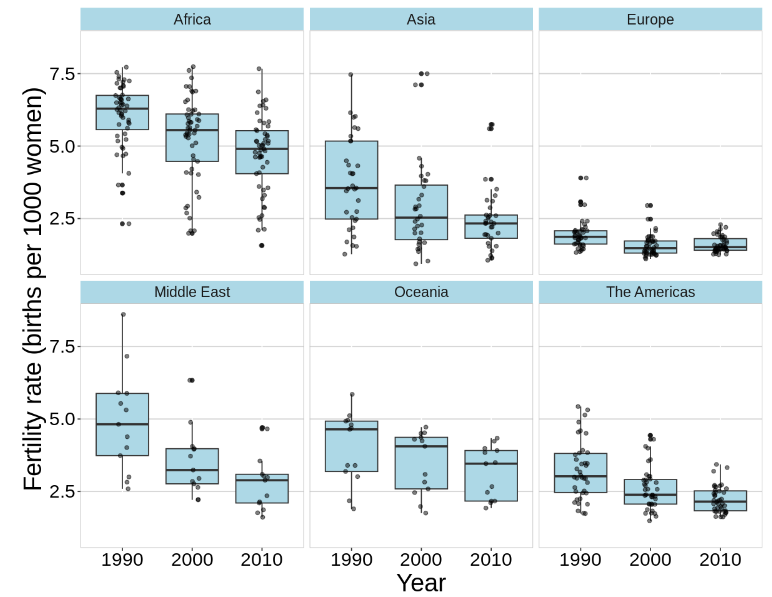

In [73]:
head(worldbank.3years)

,Country,Year,CO2,Fertility.rate,GDP.per.capita,Internet.users.per.100,Life.expectancy,Population,Region
,<chr>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
1,Afghanistan,1990,0.22182676,7.466,NA,0.0000000,49.86105,12067570,Asia
2,Afghanistan,2000,0.03964437,7.496,NA,NA,55.12588,19701940,Asia
3,Afghanistan,2010,0.30293639,5.746,569.9407,4.0000000,58.97083,27962207,Asia
4,Albania,1990,2.27838683,2.978,1879.6548,0.0000000,71.95732,3286542,Europe
5,Albania,2000,0.97817468,2.160,2256.0510,0.1140973,74.27154,3089027,Europe
6,Albania,2010,1.51563205,1.663,4094.3588,45.0000000,77.03695,2913021,Europe


In [88]:
?theme

Warning message:
“Removed 39 rows containing non-finite outside the scale range
(`stat_boxplot()`).”
Warning message:
“Removed 39 rows containing missing values or values outside the scale range
(`geom_point()`).”
Warning message:
“Removed 39 rows containing missing values or values outside the scale range
(`geom_point()`).”


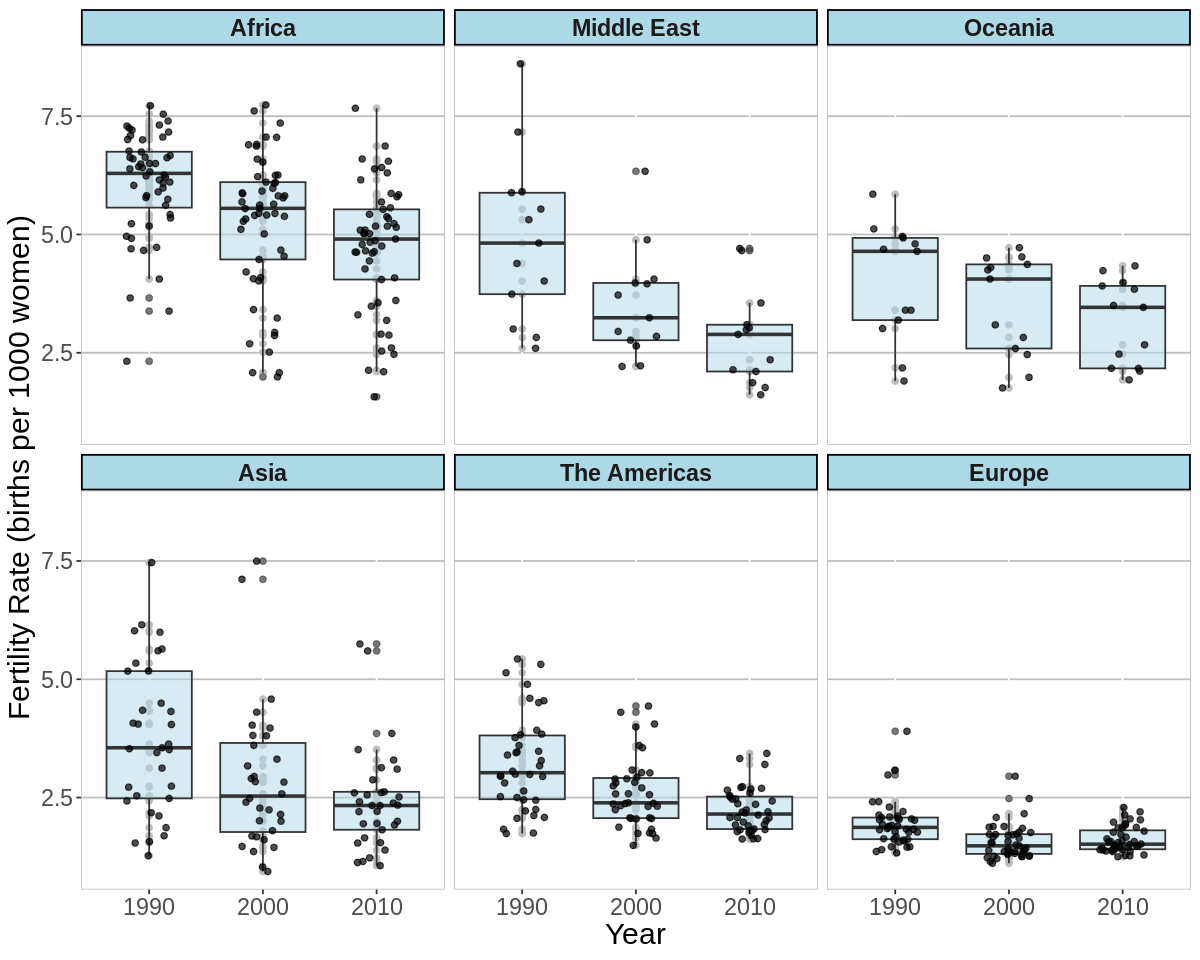

In [95]:
ggplot(data=worldbank.3years, aes(x=Year, y=Fertility.rate))+
  geom_point(color='grey')+
  geom_boxplot(fill='lightblue', alpha=0.5)+
  geom_jitter(width = 0.2, size = 1.5, alpha = 0.7) + # Jittered points
  facet_wrap(~Region)+
  labs(y='Fertility Rate (births per 1000 women)')+
  theme(panel.background = element_blank(),
        panel.grid.major.y = element_line(color='grey'),
        panel.border = element_rect(color='grey',fill=NA),
        strip.text = element_text(size = 14, face = "bold"),
        strip.background = element_rect(fill = "lightblue", color = "black", size = 1),
        axis.text = element_text(size = 14),
        axis.title = element_text(size = 18)
        )



